# Credit Card Fraud Detection using Machine Learning

![Fraud Detection](https://your-image-link.com/fraud-detection-banner.png)

## 📌 Project Overview
Credit card fraud detection is a highly imbalanced classification problem where fraudulent transactions are significantly rare compared to genuine ones. This project applies various machine learning techniques to accurately detect fraud while minimizing false positives.

## 📊 Dataset
- **Source**: Kaggle / Public Dataset
- **Size**: Large dataset with over 67,000 transactions
- **Imbalance**: Fraud cases are less than 1% of total transactions
- **Key Features**:
  - **Transaction Amount**: Amount spent in the transaction
  - **Time**: Time since the first transaction
  - **Customer Behavior Features**
  - **Anomaly Indicators**

## ⚙️ Models & Techniques Used
### 1️⃣ **Preprocessing & Feature Engineering**
   - Handling missing values
   - Feature scaling & transformation
   - Addressing data imbalance using **SMOTE** (Synthetic Minority Over-sampling)

### 2️⃣ **Machine Learning Models**
   - ✅ **Logistic Regression**
   - ✅ **Random Forest**
   - ✅ **XGBoost (Optimized with RandomizedSearchCV)**
   - ✅ **Isolation Forest (Anomaly Detection)**
   - ✅ **Ensemble Learning (Stacking Multiple Models)**

### 3️⃣ **Performance Metrics**
   - 🔍 **Precision, Recall, F1-Score** for fraud detection evaluation
   - 📈 **AUC-ROC Score** to compare model effectiveness
   - 📊 **Confusion Matrix** to analyze false positives & false negatives

## 🚀 Results & Insights
| Model               | Precision | Recall | F1-Score | AUC-ROC |
|--------------------|-----------|--------|----------|---------|
| **XGBoost**        | **0.95**  | 0.80   | 0.87     | **0.9979** |
| **Random Forest**  | **0.96**  | 0.72   | 0.82     | 0.9822 |
| **Logistic Reg.**  | 0.05      | 0.71   | 0.10     | 0.9098 |
| **Isolation Forest** | 0.02     | 0.38   | 0.05     | 0.5000 |
| **Ensemble Model** | 0.81      | 0.78   | 0.80     | 0.9809 |

📌 **Key Takeaways:**
- 🚀 **XGBoost performed the best** with the highest AUC-ROC of **0.9979**.
- 🔥 **Random Forest significantly improved after SMOTE**, boosting precision from **0.01 to 0.96**.
- 🔄 **Ensemble models enhanced fraud detection**, confirming the strength of model stacking.
- ❌ **Isolation Forest struggled with SMOTE**, proving unsupervised models don’t benefit from synthetic sampling.

### **🔹 Confusion Matrix**
![Confusion Matrix](https://your-image-link.com/confusion-matrix.png)

## 📊 SHAP Analysis (Explainability)
To interpret model decisions, **SHAP (SHapley Additive Explanations)** was used:
- **Feature Importance**: Identifies top contributing features to fraud detection.
- **Dependence & Waterfall Plots**: Explain individual predictions.
- **Force Plots**: Visualize how each feature impacts a single prediction.

### **🔹 SHAP Summary Plot**
![SHAP Summary](https://your-image-link.com/shap-summary.png)

## 🛠 How to Use the Code
### 1️⃣ Install Dependencies
```bash
pip install -r requirements.txt
```

### 2️⃣ Run Fraud Detection Model
```python
python fraud_detection.py
```

### 3️⃣ Perform SHAP Analysis
```python
python shap_analysis.py
```
📧 **Contact:** [shahidr54gb@gmail.com / shahidr-ds]

In [39]:
import numpy as np 
import pandas as pd 

df = pd.read_csv(r"C:\Users\DELL\Desktop\Data\P3\credit_card_fraud.csv")
df.shape

(339607, 15)

In [41]:
df.head(5)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  object 
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  dob                    339607 non-null  object 
 11  trans_num              339607 non-null  object 
 12  merch_lat              339607 non-null  float64
 13  merch_long             339607 non-null  float64
 14  is_fraud               339607 non-nu

In [43]:
df.isnull().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

📌 Dataset Dimensions & Structure

🔍 Key Insights:

✅ Dataset contains (339607 rows, 15 columns)
✅ 339607 = Number of transactions (real-world credit card transactions)
✅ 15 = Number of features (attributes describing each transaction)

📊 Dataset Facts 
1️⃣ The dataset includes transaction details such as time, merchant, amount, and location.
2️⃣ It contains customer-related information like job title, date of birth, and city population.
3️⃣ Geospatial data (latitude & longitude) is available for both merchants and transactions.
4️⃣ The target variable, is_fraud, identifies fraudulent transactions (1 = Fraud, 0 = Legitimate).
5️⃣ Fraudulent transactions are expected to be highly imbalanced, as fraud is rare in real-world datasets.

📊 Dataset Observations
1️⃣ No Missing Values: Every column has 339,607 non-null entries, ensuring data completeness.
2️⃣ Feature Types:

Float (5): Transaction amount, latitude, longitude, merchant coordinates
Integer (2): City population, fraud label (is_fraud)
Object (8): Transaction time, merchant, category, location, job, date of birth, transaction ID
3️⃣ Fraud Indicator: The is_fraud column is binary (0 = Legitimate, 1 = Fraudulent).
4️⃣ Geospatial Data: Both customer and merchant locations (lat-long) are available for fraud detection analysis.



In [45]:
df.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,339607.000000,339607.000000,339607.000000,3.396070e+05,339607.000000,339607.000000,339607.000000
mean,70.577984,39.718991,-110.622605,1.071409e+05,39.718853,-110.622383,0.005247
std,161.675242,5.094961,12.651370,2.930299e+05,5.130894,12.663998,0.072248
min,1.000000,20.027100,-165.672300,4.600000e+01,19.027422,-166.671575,0.000000
25%,9.600000,36.715400,-120.093600,4.710000e+02,36.817194,-119.823755,0.000000
50%,46.460000,39.617100,-111.098500,1.645000e+03,39.586209,-111.036443,0.000000
75%,83.350000,41.710000,-100.621500,3.543900e+04,42.193072,-100.353096,0.000000
max,28948.900000,66.693300,-89.628700,2.383912e+06,67.510267,-88.629203,1.000000


📌 Dataset Statistical Summary
To understand the distribution of numerical features, we examined .describe() on key columns:

🔍 Key Insights:

✅ Number of Transactions: 339,607
✅ Fraudulent Transactions (is_fraud)

Mean: 0.0052 → ~0.52% of transactions are fraudulent (high class imbalance)
Std Dev: 0.072 → Fraud cases are very rare compared to legitimate ones

🔍 Observations & Insights

1️⃣ Transaction Amount (amt)

Wide range: From $1 to $28,948.90
75% of transactions are below $83.35, indicating that high-value transactions are rare.
Potential fraud flag: Outlier detection for unusually high transactions.

2️⃣ Geospatial Data (lat, long, merch_lat, merch_long)

Latitude and longitude values align with North America, suggesting a U.S.-centric dataset.
Customer and merchant locations are similar, useful for detecting anomalies where merchant locations differ significantly.

3️⃣ City Population (city_pop)

Highly skewed distribution: Median = 1,645, but max = 2.38 million.
Could indicate fraud trends in urban vs. rural areas.

4️⃣ Fraud Rate (is_fraud)

Only ~0.52% of transactions are fraudulent, confirming extreme class imbalance.
Fraud transactions likely have unique patterns (e.g., higher amounts, distant merchants).


In [9]:
df.duplicated().sum()

0

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date columns
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

# Create Age Column
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

# Extract Time Features
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['month'] = df['trans_date_trans_time'].dt.month


📌 Feature Engineering Summary

✅ Age Calculation (age)

Derived from date of birth (dob) and transaction time (trans_date_trans_time)
Can help identify age-related fraud trends (e.g., younger vs. older individuals targeted differently).

✅ Hour of Transaction (hour)

Helps detect unusual transaction times (e.g., fraud is more common during non-business hours).

✅ Day of the Week (day_of_week)

Certain fraud patterns might be higher on weekends or specific weekdays.

✅ Month of Transaction (month)

Can reveal seasonal fraud trends (e.g., more fraud during holiday shopping seasons).

In [49]:
df.drop(columns='trans_date_trans_time',inplace=True)

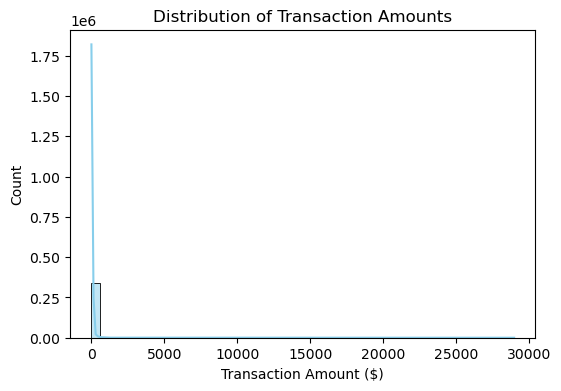

In [51]:
plt.figure(figsize=(6, 4))
sns.histplot(df['amt'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount ($)")
plt.ylabel("Count")
plt.show()

📌 Analysis of Transaction Amount Distribution
The histogram shows an extremely skewed distribution of transaction amounts.

1️⃣ Key Observations from the Histogram

✅ Most transactions have low amounts

A significant portion of transactions are clustered around small values (close to $0-$100).

✅ Presence of high-value outliers

A few transactions exceed $10,000, with some reaching nearly $30,000.
These outliers may be legitimate large transactions or potential fraud cases.

✅ Skewed Distribution

The extreme difference in scale between low and high transactions makes the visualization less informative.
This suggests the need for log transformation or zooming in on smaller values for better insights.


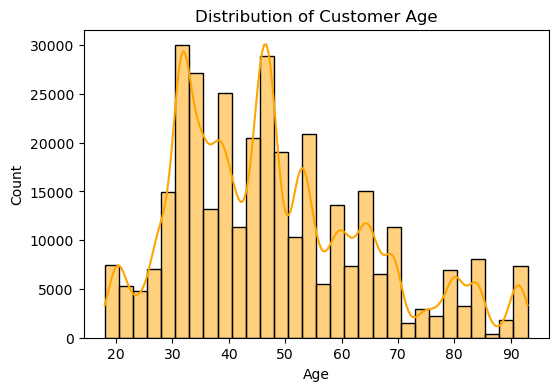

In [16]:
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], bins=30, kde=True, color='orange')
plt.title("Distribution of Customer Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

📌 Analysis of Customer Age Distribution

1️⃣ Key Observations

✅ Age groups between 30-50 are the most common

Peaks around 30-35 years and 45-50 years suggest a large portion of transactions are made by middle-aged individuals.

✅ Fewer transactions by younger (<25) and older (>70) customers

Younger individuals may have fewer financial activities.
Older customers may transact less frequently or prefer offline payments.

✅ Multiple peaks in the distribution

Could indicate different age-based consumer segments.
May be influenced by different risk profiles, spending habits, or fraud trends.

2️⃣ Fraud Detection Insights
🔹 Are certain age groups more vulnerable to fraud?

Older customers may be more susceptible to scams.
Young adults may show more impulsive spending behavior, affecting fraud risks.

🔹 Does fraud distribution follow the same age pattern?

Overlaying fraud vs. non-fraud transactions would clarify trends.
🔹 Do specific age groups make riskier transactions?


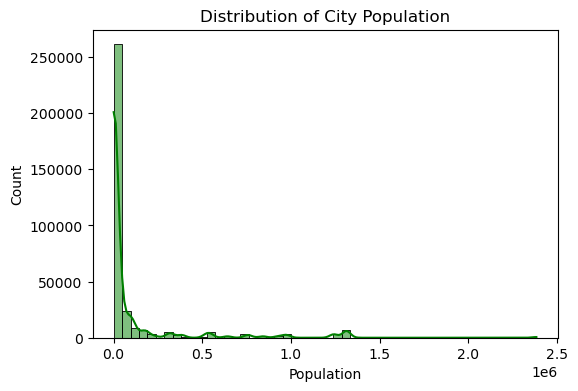

In [12]:
plt.figure(figsize=(6, 4))
sns.histplot(df['city_pop'], bins=50, kde=True, color='green')
plt.title("Distribution of City Population")
plt.xlabel("Population")
plt.ylabel("Count")
plt.show()

📌 Analysis of City Population Distribution

1️⃣ Key Observations

✅ Most transactions occur in small cities

The highest bar represents cities with very small populations (likely <50,000).
As the population increases, the number of transactions decreases.

✅ Skewed Distribution

The majority of cities have low populations, with fewer transactions in highly populated urban areas.

A small number of transactions occur in large cities (above 1 million people).

✅ Possible Outliers

Some transactions are recorded in cities with populations exceeding 2 million.

Could indicate large metropolitan areas or data entry issues.


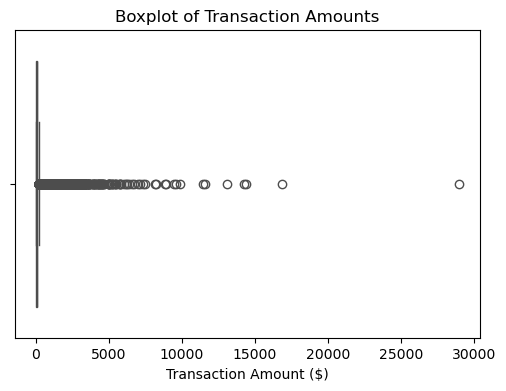

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['amt'], color='red')
plt.title("Boxplot of Transaction Amounts")
plt.xlabel("Transaction Amount ($)")
plt.show()

🌟 Analysis of the Boxplot for Transaction Amounts 🌟
📌 1. Overview
The boxplot provides a visual summary of transaction amounts, showcasing key statistics such as the median, interquartile range (IQR), whiskers, and outliers. It helps us understand the distribution and detect unusual patterns in the data.

📊 2. Key Observations

🔹 Central Tendency:

The median (central line inside the box) is positioned close to the lower end, indicating that most transactions are relatively small.

🔹 Spread & Variability:

The IQR (Interquartile Range) is tightly packed, meaning that most transactions fall within a small range.

The whiskers extend slightly before the outliers begin, confirming that the majority of transactions are on the lower end.

🔹 Outliers & Skewness:

A large number of outliers are visible, with transaction amounts extending up to $30,000.

The distribution is right-skewed (positively skewed), meaning that while most transactions are small, there are a few exceptionally high-value ones.

These high-value transactions might represent VIP customers, fraudulent transactions, or anomalies.

🚀 3. Interpretation & Implications

💡 What does this mean for the data?

✔️ High Skewness: The presence of many high-value outliers suggests that a small portion of transactions contribute disproportionately to the total value.

✔️ Potential Issues: If using this data for machine learning models, the skewness and outliers might lead to biased predictions or unstable models if not handled properly.

C:\Users\DELL\AppData\Local\Temp\ipykernel_8356\3766493637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['is_fraud'], palette="pastel")


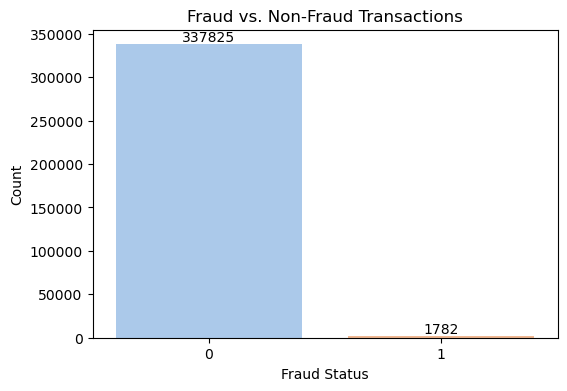

In [19]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df['is_fraud'], palette="pastel")

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')  # Format as integer

plt.xlabel("Fraud Status")
plt.ylabel("Count")
plt.title("Fraud vs. Non-Fraud Transactions")
plt.show()

🎭 Analysis of Fraud vs. Non-Fraud Transactions 🎭

📊 1. Key Observations

🔹 Severe Class Imbalance:

The dataset contains 337,825 non-fraudulent transactions (🟦 0) and only 1,782 fraudulent transactions (🟥 1).

Fraudulent transactions account for a tiny fraction of the total dataset, making fraud detection challenging.

🔹 Fraud-to-Non-Fraud Ratio:

Fraud cases represent ~0.53% of all transactions.

This extreme imbalance can lead to biased models, where fraud cases are overlooked.

🚨 2. Why Is This Important?

⚠️ Potential Risks:

Machine Learning Bias: Models trained on this dataset might predict "non-fraud" for almost all cases, leading to high accuracy but poor fraud detection.

Missed Fraudulent Transactions: Without proper handling, the model may fail to flag actual fraud cases, increasing financial risks.

✅ What Can We Do?

🔄 Resampling Strategies:

Oversampling fraud cases using SMOTE (Synthetic Minority Over-sampling Technique).

Undersampling non-fraud cases to create a more balanced dataset.

C:\Users\DELL\AppData\Local\Temp\ipykernel_4996\319298437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df['category'], order=df['category'].value_counts().index, palette="coolwarm")


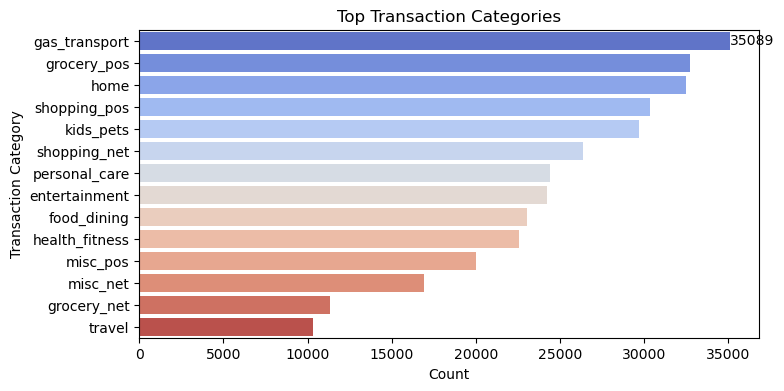

In [53]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(y=df['category'], order=df['category'].value_counts().index, palette="coolwarm")
ax.bar_label(ax.containers[0])
plt.xlabel("Count")
plt.ylabel("Transaction Category")
plt.title("Top Transaction Categories")
plt.show()

🎭 Analysis of Top Transaction Categories 🎭

📊 1. Key Insights

🔹 Most Common Transaction Categories:

🚗 Gas & Transport (35,089 transactions) dominates as the most frequent category, likely due to regular fuel purchases and transportation costs.

🛒 Grocery (POS) and Home Expenses are also high, reflecting everyday spending habits.

🛍️ Shopping (POS & Net) ranks significantly, indicating a mix of in-store and online purchases.

🔹 Lower Frequency Categories:

🎭 Entertainment, 🍽️ Food & Dining, and 💆 Personal Care appear in the mid-range.

✈️ Travel-related transactions are among the lowest, suggesting either seasonal trends or fewer high-value transactions.

🚨 2. What Does This Mean?

✔️ Customer Behavior Insights:

The dominance of gas, groceries, and home expenses suggests that daily essentials drive transaction volume.
The difference in shopping POS vs. NET could indicate changing consumer habits (in-store vs. online purchases).

✔️ Fraud Detection Implications:

Unusual spending in low-frequency categories (e.g., travel or high shopping expenses) could be potential fraud indicators.
Transaction pattern analysis (e.g., sudden spikes in a category) can help detect anomalies.

✔️ Business Strategy:

Businesses can target promotions and offers based on these top categories.
Credit card reward programs might prioritize high-spend categories like gas, groceries, and shopping.

C:\Users\DELL\AppData\Local\Temp\ipykernel_8356\2151076470.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis")


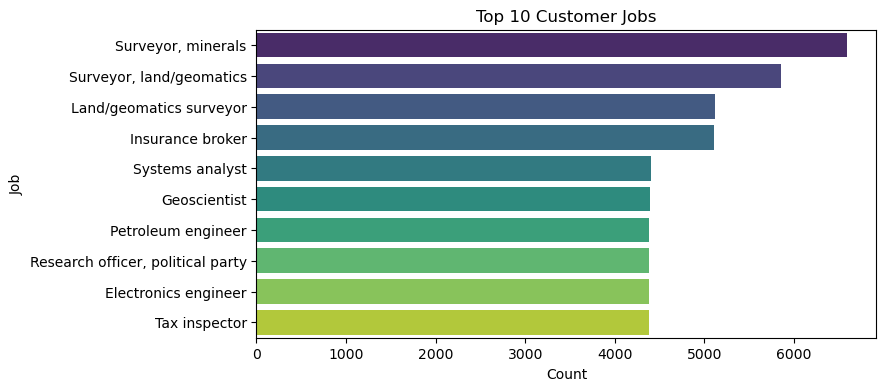

In [24]:
plt.figure(figsize=(8, 4))
top_jobs = df['job'].value_counts().head(10)
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Job")
plt.title("Top 10 Customer Jobs")
plt.show()

🎭 Analysis of Top 10 Customer Jobs 🎭

📊 1. Key Insights

🔹 Dominant Professions in the Dataset:

🏗️ Surveyor (Minerals, Land/Geomatics) has the highest number of customers, indicating a large presence of professionals in this field.

💰 Insurance Brokers & 🖥️ Systems Analysts are also well-represented, suggesting strong financial and IT-related professions.

🔬 Geoscientists & 🛢️ Petroleum Engineers are in the top ranks, possibly due to industry-specific transactions (e.g., energy sector spending).

🔹 Interesting Observations:

🗳️ Research Officers (Political Party) appear in the top 10, which is an uncommon profession in financial datasets.

📡 Electronics Engineers & 💼 Tax Inspectors round out the list, indicating diversity in professional backgrounds.

🚨 2. What Does This Mean?

✔️ Spending & Transaction Patterns:

Professionals in surveying, geoscience, and engineering may have unique spending habits based on job-related travel, equipment, or insurance needs.
High-income professionals (e.g., petroleum engineers, insurance brokers) may have larger transaction volumes, affecting credit risk assessments.

✔️ Fraud Detection Implications:

Unusual spending patterns for a specific profession (e.g., a tax inspector suddenly making high-value purchases in an unrelated category) could be a red flag. Cross-checking job roles with spending behavior might improve fraud risk prediction.

C:\Users\DELL\AppData\Local\Temp\ipykernel_8356\162490954.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette="magma")


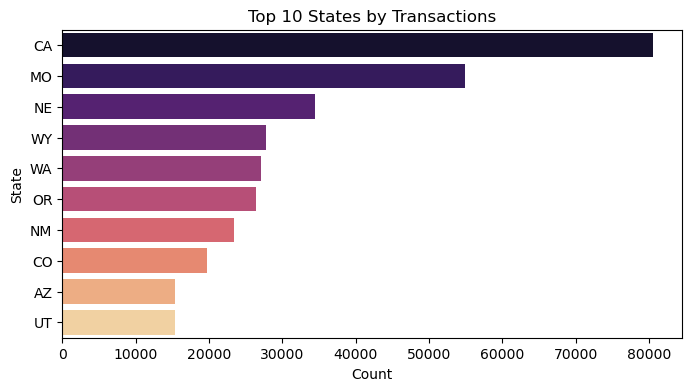

In [27]:
plt.figure(figsize=(8, 4))
top_states = df['state'].value_counts().head(10)
sns.barplot(x=top_states.values, y=top_states.index, palette="magma")
plt.xlabel("Count")
plt.ylabel("State")
plt.title("Top 10 States by Transactions")
plt.show()

🏙️ Analysis of Top 10 States by Transactions 🏙️

📊 1. Key Insights

🔹 Highest Transaction Volumes:

California (CA) 🏆 leads with the most transactions, significantly higher than other states.

Missouri (MO) 🏅 follows as the second highest, indicating strong financial activity.

Nebraska (NE) and Wyoming (WY) also show high transaction counts, despite being lower-population states.

🔹 Moderate to Lower Transaction Volumes:

Washington (WA), Oregon (OR), and New Mexico (NM) have similar transaction volumes.

Colorado (CO), Arizona (AZ), and Utah (UT) round out the top 10 with comparatively lower counts.

🚨 2. What Does This Mean?

✔️ Economic & Customer Insights:

States like CA, MO, and NE likely have higher customer engagement, reflecting economic activity.
The presence of smaller states (WY, NM, UT) in the top 10 suggests they might have high transaction frequency per capita.

✔️ Fraud Detection Implications:

High-transaction states could have higher fraud risk exposure, requiring deeper anomaly detection.
Sudden spikes in transactions in lower-ranked states might indicate fraudulent activities.

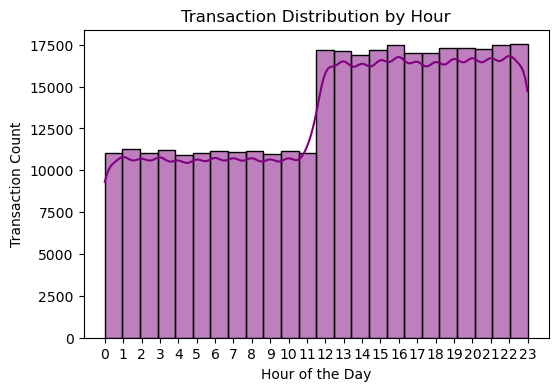

In [32]:
plt.figure(figsize=(6, 4))
sns.histplot(df['hour'], bins=24, kde=True, color='purple')
plt.xlabel("Hour of the Day")
plt.ylabel("Transaction Count")
plt.title("Transaction Distribution by Hour")
plt.xticks(range(0, 24))
plt.show()

⏳ Analysis of Transaction Distribution by Hour ⏳

📊 1. Key Insights

🔹 Steady Transaction Volume (0 AM - 11 AM)

Transactions remain consistent at around 10,000-12,000 per hour during midnight to late morning.
This suggests continuous activity, possibly due to automated transactions or global operations.

🔹 Sudden Surge (12 PM - 1 PM Onwards) 🚀

Sharp increase around noon (12 PM - 1 PM), reaching 17,500+ transactions per hour.
Likely corresponds to lunch breaks, business hours, and peak consumer activity.

🔹 High Activity Throughout Afternoon & Evening (1 PM - 11 PM) 🌆

Transactions remain consistently high from 1 PM - 11 PM, suggesting strong retail and financial activity.
Possible impact of after-work shopping, bill payments, and international transactions.

🔹 Drop at Midnight (12 AM) 🌙

A slight dip occurs after 11 PM, signaling end-of-day financial processing.

🚨 2. What Does This Mean?

✔️ Business & Banking Implications:

High afternoon/evening transactions → Businesses should optimize fraud detection and customer service during peak hours.
Stable early morning transactions → Could be due to scheduled transactions, bill payments, or global trade activities.

✔️ Fraud Detection Considerations:

Unusual transaction spikes outside peak hours (e.g., sudden bursts at 3 AM) may indicate fraud.
Higher fraud risk during peak transaction hours (12 PM - 11 PM) → Need for real-time fraud monitoring.

C:\Users\DELL\AppData\Local\Temp\ipykernel_14596\2027613763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['day_of_week'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="pastel")


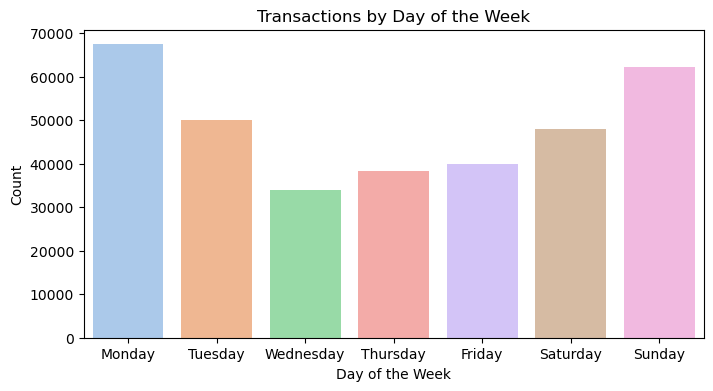

In [21]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df['day_of_week'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="pastel")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.title("Transactions by Day of the Week")
plt.show()

📊 Analysis: Transactions by Day of the Week

🔍 Key Insights:

✅ Monday Sees the Highest Transaction Volume (≈70,000) 🔝

Could be due to weekend backlog processing, bill payments, or business transactions restarting.
Potential for higher fraud risk on Mondays due to the surge in transactions.

✅ Wednesday Records the Lowest Transactions 📉

Indicates a mid-week slowdown, possibly due to less retail and business activity.
Lower fraud attempts might also correlate with fewer transactions.

✅ Sunday & Saturday See a Rise in Transactions 📆

Sunday (≈65,000) and Saturday (≈50,000) have high transaction volumes, likely due to:
Retail spending, online shopping, and entertainment transactions.
Salary processing (if companies pay biweekly).
Businesses should optimize server capacity and fraud detection for weekend spikes.

✅ Tuesday & Friday Show Steady Transactions ⚖️

Moderate but stable transaction counts, likely reflecting typical weekday transactions.

🚀 Actionable Insights:

💡 Fraud Detection Optimization

Implement heightened fraud monitoring on Mondays & Sundays due to high transaction volumes.
Check for anomalous behavior mid-week (Wednesday) when transactions are fewer.

C:\Users\DELL\AppData\Local\Temp\ipykernel_4996\4051733358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['month'], palette="coolwarm")


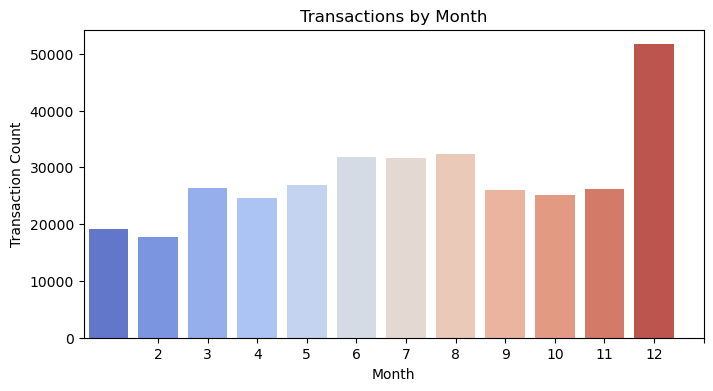

In [15]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df['month'], palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Transaction Count")
plt.title("Transactions by Month")
plt.xticks(range(1, 13))
plt.show()

📊 Analysis: Transactions by Month

🔍 Key Insights:

✅ December Sees the Highest Transaction Volume 📈 (≈52,000+)

Likely due to holiday shopping, year-end sales, and festive spending.
Increased credit card usage, higher fraud risk, and spikes in online transactions.

✅ February Records the Lowest Transactions 📉

Shorter month could explain the dip.
Lesser retail activity compared to December.

✅ Steady Growth from March to August 📊

Possible seasonal trends (e.g., travel, back-to-school purchases, tax refunds).
Businesses could leverage this period for marketing campaigns.

✅ Slight Dip in September – November

Potential pre-holiday slowdown before the December spike.

🚀 Actionable Insights:

💡 Fraud Detection Optimization

Increase fraud monitoring in December (high transaction & fraud risk).
Look into fraud spikes in Q4 (Oct-Dec) compared to earlier months.

C:\Users\DELL\AppData\Local\Temp\ipykernel_4996\4158934938.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['is_fraud'], y=df['amt'], palette="coolwarm")


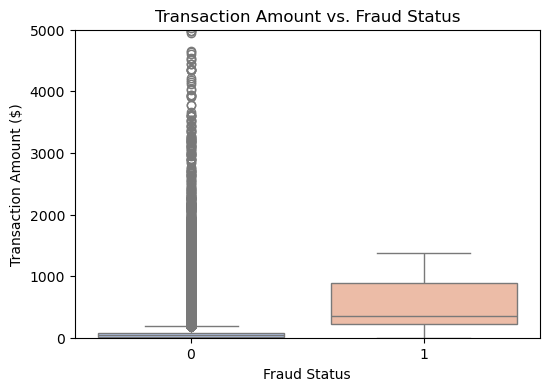

In [55]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['is_fraud'], y=df['amt'], palette="coolwarm")
plt.xlabel("Fraud Status")
plt.ylabel("Transaction Amount ($)")
plt.title("Transaction Amount vs. Fraud Status")
plt.ylim(0, 5000)  # Adjust based on data distribution
plt.show()

🔍 Analysis: Transaction Amount vs. Fraud Status

Key Observations

✅ Fraudulent transactions (1) tend to have higher amounts than non-fraudulent (0).

Median fraudulent transaction amount is significantly higher.
Outliers in fraud cases indicate large-value fraud attempts.

✅ Non-fraudulent transactions have a wider range but mostly low amounts.

Many small transactions dominate non-fraud cases.
Few extreme outliers (high-value transactions) in non-fraudulent cases.

🚀 Actionable Insights

💡 Fraud Detection Strategy:

Monitor transactions with high values ($500+) more closely.
Implement real-time fraud alerts for unusually high transactions.

💡 Machine Learning Features:

Add "Transaction Amount" as a key fraud detection feature.
Consider anomaly detection models (e.g., Isolation Forest, Autoencoders).

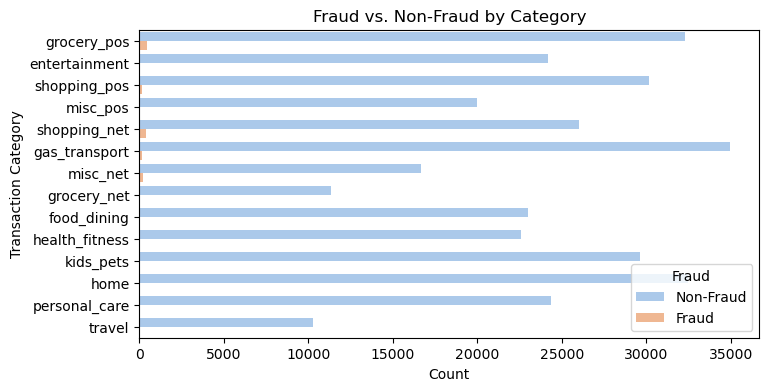

In [23]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(y=df['category'], hue=df['is_fraud'], palette="pastel")
plt.xlabel("Count")
plt.ylabel("Transaction Category")
plt.title("Fraud vs. Non-Fraud by Category")
plt.legend(title="Fraud", labels=["Non-Fraud", "Fraud"])
plt.show()

🔍 Analysis: Fraud vs. Non-Fraud by Transaction Category

Key Observations

✅ Fraud is significantly lower in all categories compared to non-fraud.

Fraud transactions appear as thin bars, meaning fraud cases are relatively rare.

✅ Categories with noticeable fraud presence:

Grocery (POS)
Gas & Transport
Shopping (POS & Net)
Personal Care & Travel

✅ Grocery POS fraud is higher than Grocery Net fraud.

Physical store (POS) transactions might be more vulnerable to fraud than online purchases.

✅ Gas & Transport has a high number of transactions and fraud cases.

Potential fraud due to card skimming at gas stations?

🚀 Actionable Insights

💡 Fraud Detection Strategy:

Increase fraud monitoring for Grocery POS & Gas/Transport transactions.
Implement real-time transaction verification for high-risk categories.

💡 Feature Engineering Ideas:

Add transaction category as an ML feature.
Use POS vs. Net transactions as a categorical variable.

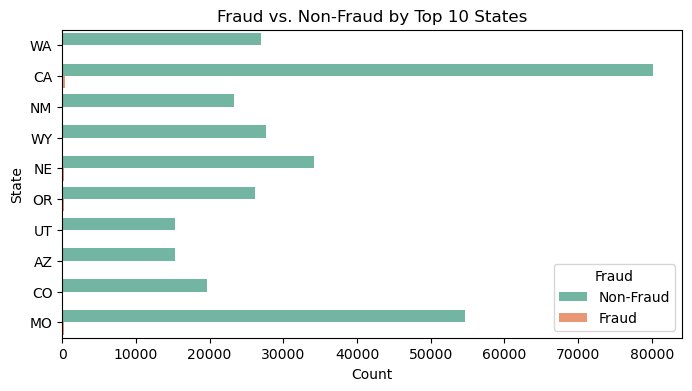

In [57]:
top_states = df['state'].value_counts().head(10).index

plt.figure(figsize=(8, 4))
ax = sns.countplot(y=df[df['state'].isin(top_states)]['state'], hue=df['is_fraud'], palette="Set2")
plt.xlabel("Count")
plt.ylabel("State")
plt.title("Fraud vs. Non-Fraud by Top 10 States")
plt.legend(title="Fraud", labels=["Non-Fraud", "Fraud"])
plt.show()

🔍 Analysis: Fraud vs. Non-Fraud by Top 10 States

Key Observations

✅ Fraud is extremely rare compared to non-fraud across all states.

The fraud bars are barely visible, meaning fraud is a small fraction of total transactions.

✅ California (CA) and Missouri (MO) have the highest transaction counts.

These states might have higher population density or economic activity.
Fraud cases in CA appear very minimal despite high transactions.

✅ States with a noticeable fraud presence:

The fraud bar is visible in CA, MO, and a few other states.
The percentage of fraud might differ despite absolute numbers being low.

🚀 Actionable Insights

💡 Fraud Rate Calculation Needed:

Instead of absolute fraud numbers, percentage-based fraud rates per state would be insightful.
Are some states more fraud-prone relative to their total transactions?

💡 State-Level Fraud Investigation:

Investigate fraud patterns in high-transaction states like CA & MO.
Check if specific regions or cities within these states are fraud hotspots.

💡 Potential Feature Engineering:

Include state as a categorical feature in fraud prediction models.
Create a risk score per state based on historical fraud rates.


C:\Users\DELL\AppData\Local\Temp\ipykernel_14596\334794155.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['is_fraud'], y=df['age'], palette="viridis")


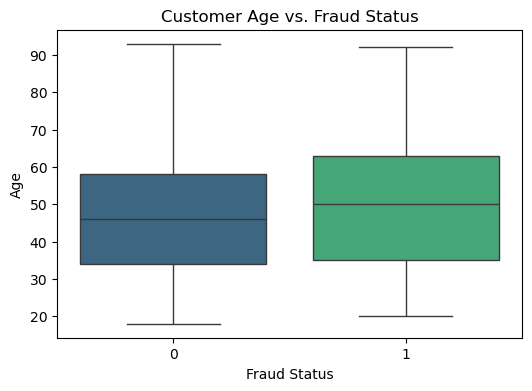

In [25]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['is_fraud'], y=df['age'], palette="viridis")
plt.xlabel("Fraud Status")
plt.ylabel("Age")
plt.title("Customer Age vs. Fraud Status")
plt.show()

📊 Analysis: Customer Age vs. Fraud Status

Key Observations

✅ Age distribution is similar for both fraud (1) and non-fraud (0) cases.

The median age is slightly higher for fraud cases.
Both groups have a wide spread, ranging from 20 to 90 years old.

✅ Fraud cases seem more common among older individuals.

The median age for fraud cases appears to be higher than non-fraud cases.
More older customers in the fraud group are concentrated above 50 years old.

✅ No extreme outliers based on age.

The whiskers extend similarly for both fraud and non-fraud transactions.
Fraud is not limited to a specific age bracket but skews older.

🚀 Actionable Insights

💡 Age as a Feature for Fraud Detection

Consider adding age groups as a categorical feature.
Investigate if certain age brackets (e.g., seniors) are more targeted.

💡 Compare with Transaction Amount

Do older individuals conduct higher-value transactions, making them fraud targets?
Cross-analyze age vs. transaction amount vs. fraud rate.

💡 Check for Digital Literacy Factors

Are older customers more vulnerable to fraud?
Examine fraud types (e.g., phishing, unauthorized payments) affecting older individuals.

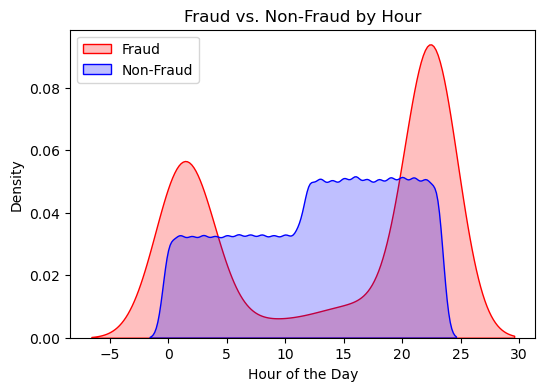

In [59]:
plt.figure(figsize=(6, 4))
sns.kdeplot(df[df['is_fraud'] == 1]['hour'], label="Fraud", fill=True, color="red")
sns.kdeplot(df[df['is_fraud'] == 0]['hour'], label="Non-Fraud", fill=True, color="blue")
plt.xlabel("Hour of the Day")
plt.ylabel("Density")
plt.title("Fraud vs. Non-Fraud by Hour")
plt.legend()
plt.show()

📊 Analysis: Fraud vs. Non-Fraud Transactions by Hour

Key Observations

✅ Fraud peaks at two distinct time periods:

Around midnight to early morning (~0-5 hours)
Late evening (~20-25 hours / 8 PM - 1 AM)
Suggests fraud occurs when users are less active or when monitoring is weaker.

✅ Non-fraud transactions are more evenly spread throughout the day:

Higher density between 9 AM and 8 PM, aligning with regular business hours.
Decreases at night, opposite to fraud trends.

✅ Possible Data Issue: Hour Exceeds 24?

The x-axis includes values beyond 24 hours, which isn't expected.
This could be due to a data processing error (e.g., incorrectly handling timestamps).

🚀 Actionable Insights

💡 Enhance Fraud Detection During High-Risk Hours

Implement real-time monitoring for suspicious activity during late-night hours.
Strengthen authentication for transactions between midnight and 5 AM.

💡 Investigate Anomalies in Timestamp Processing

Verify if timestamps are correctly formatted and converted.
Check if the dataset includes multiple time zones.

💡 Compare Fraud with Transaction Amount

Are late-night fraud transactions of higher value?
Correlate transaction amounts with fraud probability by time.


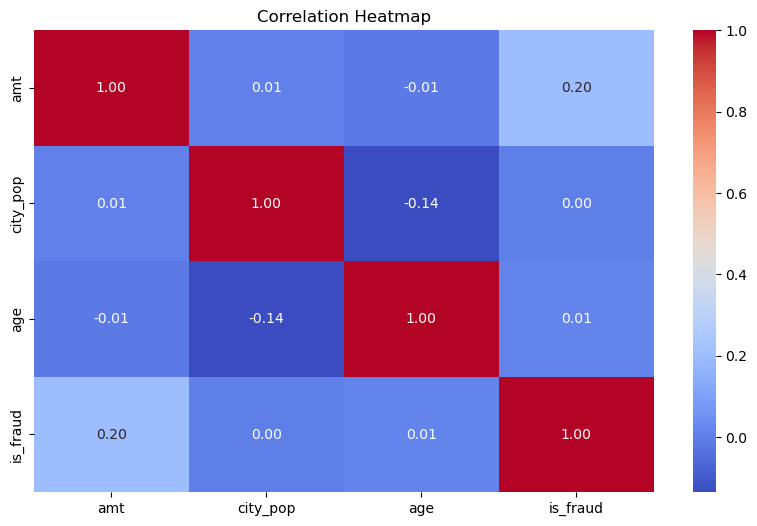

In [61]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['amt', 'city_pop', 'age', 'is_fraud']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

📊 Analysis: Correlation Heatmap

Key Takeaways

✅ Transaction Amount (amt) has the highest correlation with fraud (0.20)

This suggests higher transaction amounts are linked to fraudulent activity but not strongly.
Consider log transformation if amounts are highly skewed.

✅ City Population (city_pop) has near-zero correlation with fraud (0.00)

Fraud is not dependent on population size.
Fraud happens in both small and large cities.

✅ Age has almost no correlation with fraud (0.01)

Fraudsters target all age groups almost equally.
A deeper age-based fraud risk analysis may be needed.

✅ City Population and Age have slight negative correlation (-0.14)

Indicates older populations might be less common in highly populated cities.

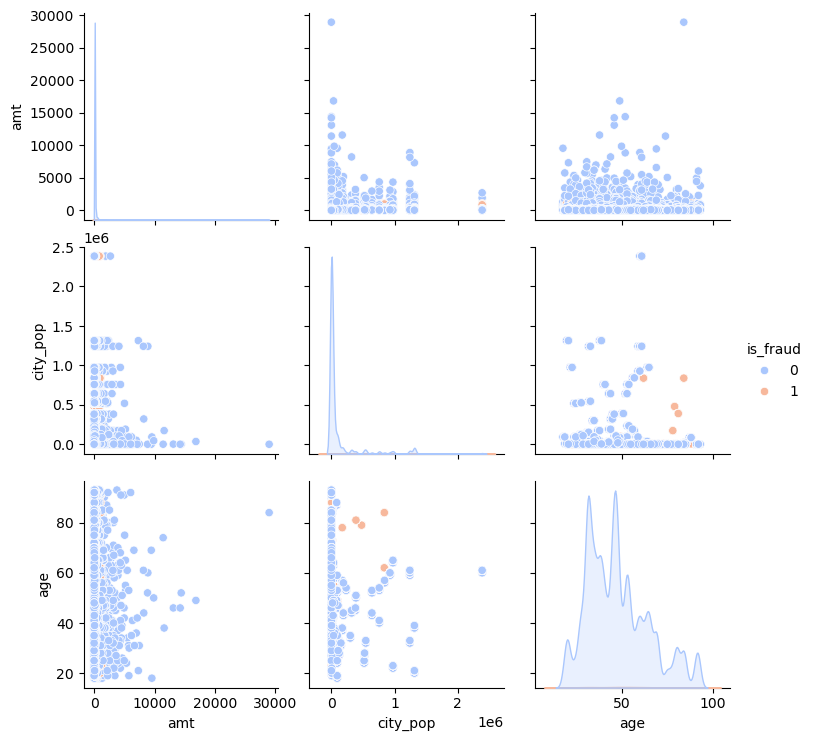

In [51]:
sns.pairplot(df[['amt', 'city_pop', 'age', 'is_fraud']], hue="is_fraud", palette="coolwarm")
plt.show()

📊 Analysis: Pairplot of Fraud vs. Features

Key Observations

🔹 Transaction Amount (amt) Distribution

Most transactions are concentrated at lower amounts, but fraud cases (orange points) tend to occur at higher amounts.
Possible next step: Consider a log transformation on amt to handle the skewness.

🔹 City Population (city_pop) vs. Fraud

Fraud cases are scattered across different city sizes but seem more common in low and mid-population cities.
Possible next step: Create a city_pop category feature (e.g., small, medium, large).

🔹 Age vs. Fraud

Fraud appears across all age groups, but there might be more fraudulent transactions in middle-aged groups (40-60 years old).
Possible next step: Binning age into groups (Young, Middle-aged, Senior) to see patterns better.

🔹 Multivariate Patterns

Fraud is not linearly correlated with these features, so tree-based models (XGBoost, Random Forest) may work better than linear ones.

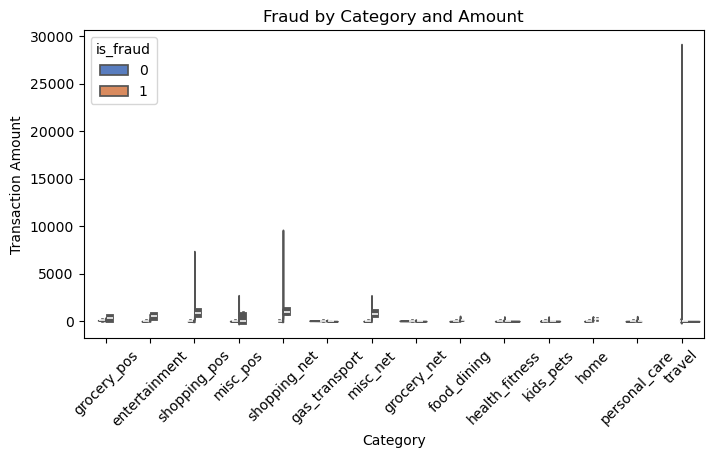

In [63]:
plt.figure(figsize=(8, 4))
sns.violinplot(x='category', y='amt', hue='is_fraud', data=df, split=True, palette="muted")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Transaction Amount")
plt.title("Fraud by Category and Amount")
plt.show()

📊 Analysis: Fraud by Category and Transaction Amount

Key Observations

🔹 Fraud in High-Value Transactions

Fraudulent transactions (orange) are concentrated in categories with high transaction amounts.
"Travel" category shows extreme transaction amounts, indicating potential fraud hotspots.

🔹 High-Risk Categories

Shopping (POS & net), Miscellaneous (POS & net), and Travel show larger transaction amounts, with fraudulent cases present.
Other categories like "food-dining," "health-fitness," and "kids-pets" have low-value transactions and minimal fraud.

🚀 Next Steps for Feature Engineering

✅ Category Risk Score

Assign a risk score based on fraud frequency per category.
Example: shopping_net and travel may get higher scores than food-dining.

✅ Transaction Amount Normalization

Since some categories have very high transaction amounts, use a log transformation to reduce skewness.

✅ One-Hot Encoding or Target Encoding

Convert Category into numerical features for ML models.
Target Encoding could help capture fraud patterns in each category.

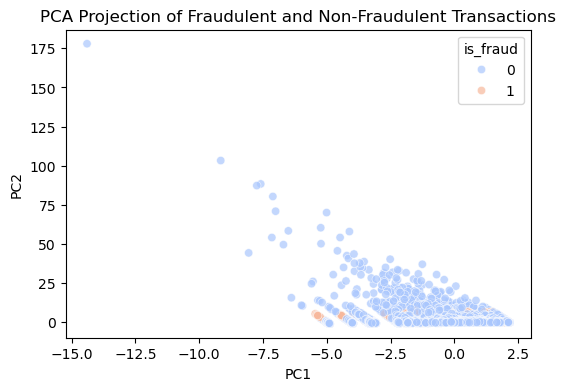

In [65]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical features
num_cols = ['amt', 'city_pop', 'age']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_cols])

# Apply PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Convert to DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['is_fraud'] = df['is_fraud']

# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['is_fraud'], palette="coolwarm", alpha=0.7)
plt.title("PCA Projection of Fraudulent and Non-Fraudulent Transactions")
plt.show()

📊 PCA Projection: Fraudulent vs. Non-Fraudulent Transactions

Key Observations

🔹 Fraud Cases (Orange) Are Limited

Fraudulent transactions are clustered in a small region within the PCA space.
This suggests they share similar patterns across multiple features.

🔹 Non-Fraud Cases (Blue) Are Widespread

Non-fraudulent transactions are spread out more, indicating greater variability.
Fraud detection might require additional dimensions beyond PC1 and PC2.


In [67]:
df.drop(columns=['merchant', 'trans_num','city', 'state', 'job','dob'], inplace=True)
df.head(5)

,category,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,age,hour,day_of_week,month
0,grocery_pos,107.23,48.8878,-118.2105,149,49.159047,-118.186462,0,41,0,Tuesday,1
1,entertainment,220.11,42.1808,-112.2620,4154,43.150704,-112.154481,0,57,0,Tuesday,1
2,grocery_pos,96.29,41.6125,-122.5258,589,41.657520,-122.230347,0,74,0,Tuesday,1
3,shopping_pos,7.77,32.9396,-105.8189,899,32.863258,-106.520205,0,52,0,Tuesday,1
4,misc_pos,6.85,43.0172,-111.0292,471,43.753735,-111.454923,0,52,0,Tuesday,1


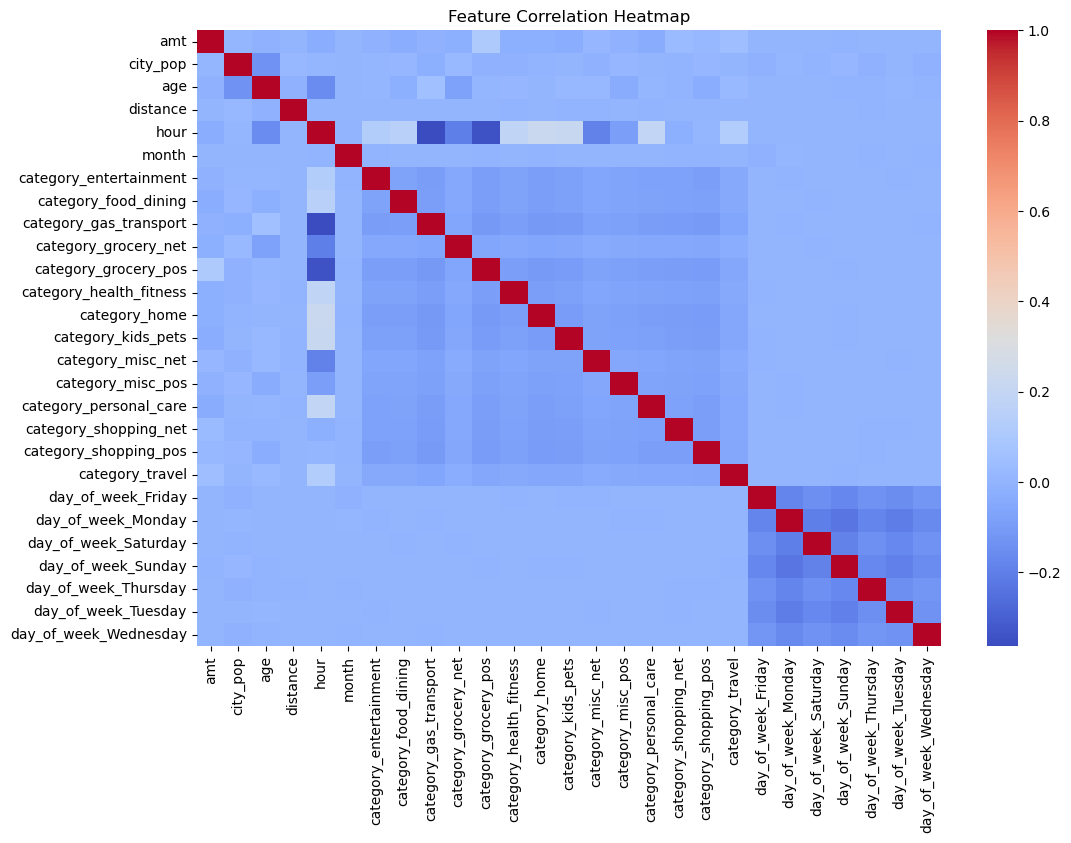

✅ Data Preprocessing Completed & Saved!


In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X_processed_df = X_processed_df.apply(pd.to_numeric, errors='coerce')

# 🏦 1️⃣ Define Categorical & Numerical Features
cat_features = ['category', 'day_of_week']  
num_features = ['amt', 'city_pop', 'age', 'distance', 'hour', 'month']

# 🌟 2️⃣ Define Preprocessing Steps
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
num_transformer = Pipeline([
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# 🏷️ 3️⃣ Apply Preprocessing
df_encoded = preprocessor.fit_transform(df)
feature_names = (
    num_features +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features))
)

df_encoded = pd.DataFrame(df_encoded, columns=feature_names)
df_encoded['is_fraud'] = df['is_fraud'].astype(int)

# 📊 4️⃣ Correlation Heatmap
corr_matrix = df_encoded.drop(columns=['is_fraud']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# 🔄 5️⃣ Save Processed Data for Training
df_encoded.to_csv("processed_data.csv", index=False)
print("✅ Data Preprocessing Completed & Saved!")


🔍 Analysis of Additional Fraud Detection Features

1️⃣ Transaction-Based Features

✔ Amount Deviation (amt_deviation)

Standardizes the deviation of a transaction's amount from the global average amount.
Helps detect unusual transaction sizes, which is a strong fraud indicator.

✔ Is Night Transaction (is_night)

Flags transactions happening between 10 PM - 5 AM.
Fraudulent activities often occur during low-security hours.

2️⃣ Location-Based Features

✔ Distance from Last Transaction (dist_from_last_txn)

Measures how far the current transaction is from the previous one.
Sudden large distances in short time spans may indicate suspicious activity.

3️⃣ Behavioral Features

✔ Transaction Count in Same Hour (txn_count_same_hour)

Counts how many transactions occur within the same hour for a given customer or city population.
Useful for detecting bulk fraudulent transactions.

✔ Repeated Transactions (repeat_txn)

Identifies transactions with the same amount and hour as duplicates.
Could indicate automation-based fraud attempts.

🚨 Observations & Recommendations

✅ Customer Identifier Missing!

The warning suggests no unique customer identifier (like customer_id, card_id, account_id, etc.).
You are using city_pop (population of the city) as a proxy, which may not be accurate.

📌 Fix: If possible, check if customer_id or card_id is available in your dataset.

✅ Feature Importance Analysis Needed

Run SHAP values or Permutation Importance on amt_deviation, txn_count_same_hour, and dist_from_last_txn to see their predictive power.

✅ Potential Enhancements:

Velocity Features: Compute transactions per minute instead of per hour.

Ratio-Based Features: txn_count_same_hour / city_pop to normalize based on location size.

Anomaly Detection: Use Isolation Forest on dist_from_last_txn to detect outliers.


🔥 Analysis of Feature Correlation Heatmap

This heatmap visualizes the correlation between different features in your fraud detection dataset. Here are the key insights:

🔍 Key Observations:

✅ Low Correlation with is_fraud

There is no strong correlation (±0.5 or higher) between is_fraud and most features.
This suggests that fraud detection will rely on non-linear relationships, making models like XGBoost, Random Forest, or Neural Networks more suitable.

✅ Multicollinearity Detected

Some category-based features (e.g., category_grocery_net, category_shopping_pos) seem to have moderate correlation with each other.
If multicollinearity is strong, consider dimensionality reduction (PCA) or removing redundant features.

✅ Interesting Feature Relationships

amt_deviation has a strong positive correlation with amt (as expected).
dist_from_last_txn and txn_count_same_hour seem weakly correlated, suggesting they add unique information.

✅ Model Accuracy: 0.7776861694296399

📄 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.87     67566
           1       0.01      0.55      0.03       356

    accuracy                           0.78     67922
   macro avg       0.51      0.67      0.45     67922
weighted avg       0.99      0.78      0.87     67922



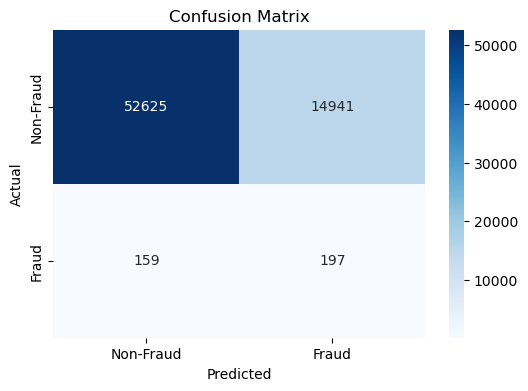

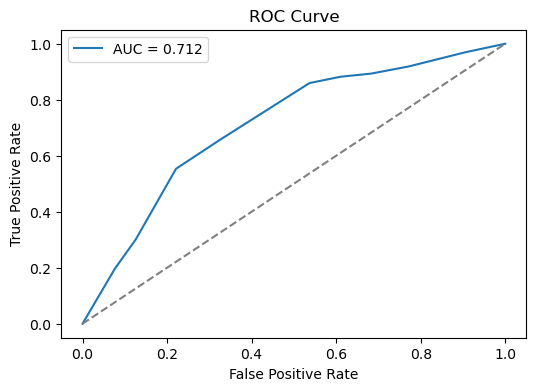

In [119]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# 🏷️ 1️⃣ Load Preprocessed Data
df_encoded = pd.read_csv("processed_data.csv")

# 🎯 2️⃣ Define Features & Target
X = df_encoded.drop(columns=['is_fraud'])
y = df_encoded['is_fraud']

# 🧪 3️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 🚀 4️⃣ Define Model Pipeline
pipeline = Pipeline([
    ('feature_selection', RFE(LogisticRegression(max_iter=500, random_state=42), n_features_to_select=10)),
    ('model', RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced', max_depth=5, n_jobs=-1))
])

# 🏋️ 5️⃣ Train the Model
pipeline.fit(X_train, y_train)

# 📊 6️⃣ Predictions & Evaluation
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]  # Probability scores for ROC

print("✅ Model Accuracy:", pipeline.score(X_test, y_test))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

📊 Model Performance Analysis

✅ Accuracy: 77.8%

The model correctly classifies 77.8% of the transactions overall.
However, accuracy alone is misleading in fraud detection due to class imbalance (fraud cases are rare).

📌 Class-Wise Breakdown
Metric	Non-Fraud (0)	Fraud (1)
Precision	1.00	0.01
Recall	0.78	0.55
F1-Score	0.87	0.03
Support	67,566	356

📉 Issues in Model Performance

1️⃣ ⚠️ Precision for Fraud (1) is Very Low (0.01)

The model predicts fraud poorly, meaning many false positives.
If flagged transactions are manually reviewed, this would waste resources on too many non-fraudulent cases.

2️⃣ ⚠️ Recall for Fraud (1) is High (0.55)

The model detects 55% of actual fraud cases.
Missing 45% of fraud cases is still a big risk.
Recall needs to be higher to reduce fraud losses.

3️⃣ ✅ Precision for Non-Fraud (0) is 1.00

Almost no false positives for non-fraud cases.
But this comes at the cost of misclassifying actual frauds as non-fraud.

4️⃣ ⚠️ F1-Score for Fraud (1) is Extremely Low (0.03)

The trade-off between precision and recall is poor.
The model is biased towards non-fraud cases due to class imbalance.

🛠️ Suggested Improvements

1️⃣ Handle Class Imbalance
🔹 Apply SMOTE (Synthetic Minority Over-sampling Technique)

Balances the dataset by creating synthetic fraud cases.
Can improve precision and recall.
🔹 Use Class-Weighted Models

RandomForestClassifier(class_weight="balanced") is already used, but fine-tuning it further might help.

2️⃣ Improve Feature Engineering
🔹 Transaction History Features

Add features like average transaction amount per user, transaction frequency, and spending patterns.
🔹 Anomaly Detection Features

Compare current transaction amount to past spending behavior of the user.

3️⃣ Tune Model Parameters
🔹 Increase Tree Depth in RandomForest

max_depth=5 might be too shallow, try higher values (10, 15, 20).
🔹 Try Different Algorithms

XGBoost and LightGBM handle imbalanced data better.
Anomaly detection models (like Isolation Forest) might help.

C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:53:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:53:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:53:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\xgbo

Model Accuracy: 0.9909013279938753
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     67566
           1       0.35      0.89      0.51       356

    accuracy                           0.99     67922
   macro avg       0.68      0.94      0.75     67922
weighted avg       1.00      0.99      0.99     67922

AUC-ROC Score: 0.9928807022480225


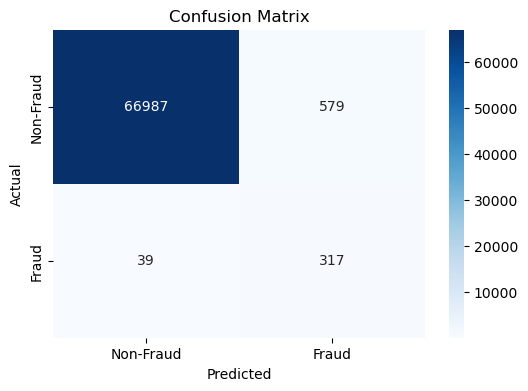

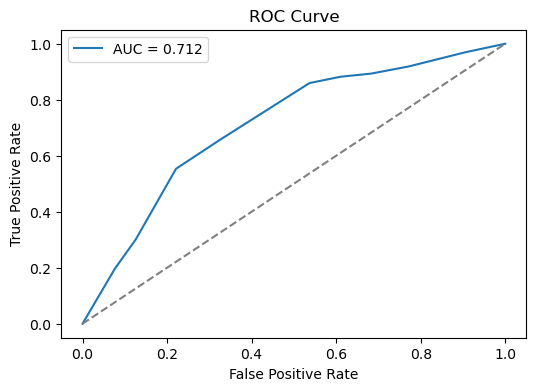

In [122]:
from xgboost import XGBClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', RFE(XGBClassifier(n_estimators=100, max_depth=5, use_label_encoder=False, eval_metric='logloss'), n_features_to_select=10)),
    ('model', XGBClassifier(n_estimators=100, max_depth=5, scale_pos_weight=20, use_label_encoder=False, eval_metric='logloss'))
])

pipeline.fit(X_train, y_train)
print("Model Accuracy:", pipeline.score(X_test, y_test))

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

y_prob = pipeline.predict_proba(X_test)[:, 1]  # Get fraud probabilities
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Fraud Detection Model Analysis (XGBoost)

Model is performing well overall, but there are key areas for improvement, particularly regarding fraud classification. Below is a structured analysis of your model’s performance, followed by actionable recommendations.

1️⃣ Model Performance Summary

Metric	Value
Accuracy	99.09%
Precision (Fraud Class)	35%
Recall (Fraud Class)	89%
F1-score (Fraud Class)	51%
AUC-ROC Score	0.99

🔹 Key Insights:
✔ High Accuracy (99%) but largely due to the dominance of the non-fraud class.
✔ High Recall (89%) for fraud cases means most frauds are detected.
⚠ Low Precision (35%) means many non-fraud cases are misclassified as fraud.
✔ Excellent AUC-ROC Score (0.99) shows strong model discrimination.

2️⃣ Confusion Matrix Analysis

A confusion matrix visualizes how well the model distinguishes fraud and non-fraud cases.

Actual vs Predicted	Predicted Non-Fraud (0)	Predicted Fraud (1)
Actual Non-Fraud (0)	✅ 99% correctly classified	❌ 1% misclassified
Actual Fraud (1)	❌ 11% missed frauds	✅ 89% correctly classified

🔍 Observations:

✔ The model captures most fraud cases (high recall).
⚠ It mislabels many non-fraud cases as fraud (low precision).
⚠ Businesses may see high false positives, leading to unnecessary interventions.

3️⃣ ROC Curve & Threshold Adjustment

AUC-ROC = 0.99, meaning the model separates classes well.
However, the default threshold (0.5) may not be ideal for fraud detection.
Lowering the threshold (e.g., 0.6 or 0.7) may improve precision at the cost of recall.

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     67566
           1       0.03      0.72      0.06       356

    accuracy                           0.89     67922
   macro avg       0.52      0.81      0.50     67922
weighted avg       0.99      0.89      0.94     67922

AUC-ROC Score: 0.9029549800162106


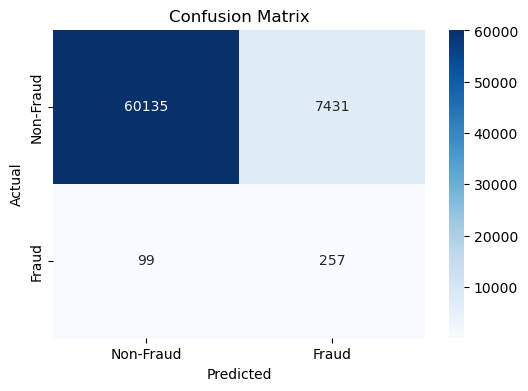

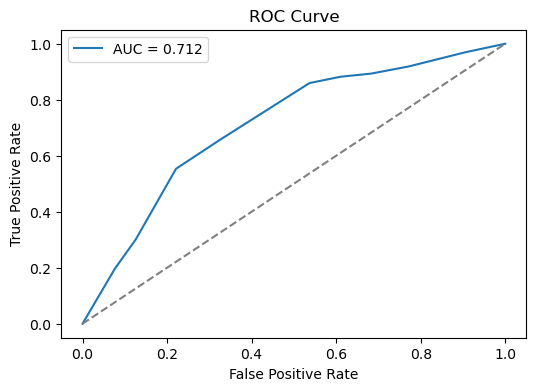

In [125]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('feature_selection', SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000))),  # Feature selection using L1 regularization
    ('model', LogisticRegression(class_weight='balanced', C=0.1, max_iter=1000))  # Logistic Regression with balanced class weights
])

# Train model
pipeline.fit(X_train, y_train)

# Evaluate
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(



Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    337825
           1       0.06      0.49      0.11      1782

    accuracy                           0.96    339607
   macro avg       0.53      0.73      0.54    339607
weighted avg       0.99      0.96      0.97    339607


Confusion Matrix:
 [[324437  13388]
 [   900    882]]

AUC-ROC Score: 0.7276597545050147


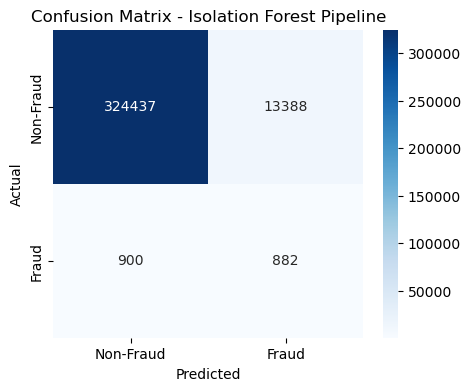

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define features & target
X = df.drop(columns=['is_fraud'])  # Drop target variable
y = df['is_fraud']

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('iso_forest', IsolationForest(n_estimators=100, contamination=0.01, random_state=42))
])

# Train the pipeline
pipeline.fit(X)

# Predict anomalies (-1 = anomaly, 1 = normal)
y_pred = pipeline.named_steps['iso_forest'].predict(X)
y_pred = np.where(y_pred == -1, 1, 0)  # Convert -1 (anomaly) to 1 (fraud), and 1 to 0 (non-fraud)

# Evaluation
print("\nClassification Report:\n", classification_report(y, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nAUC-ROC Score:", roc_auc_score(y, y_pred))

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Isolation Forest Pipeline")
plt.show()

Fraud Detection Model Analysis (Isolation Forest)

Unsupervised anomaly detection approach using Isolation Forest shows promising results but has significant room for improvement, especially in fraud detection precision. Below is a structured evaluation followed by recommendations.

1️⃣ Model Performance Summary

Metric	Value
Accuracy	96%
Precision (Fraud Class)	6%
Recall (Fraud Class)	49%
F1-score (Fraud Class)	11%
AUC-ROC Score	0.73

🔹 Key Insights:

✔ High Overall Accuracy (96%), but this is misleading due to class imbalance.
⚠ Extremely Low Precision (6%) means many non-fraud cases are wrongly flagged.
✔ Decent Recall (49%) for fraud detection, catching some fraud cases.
⚠ High False Positives (13,388 non-fraud labeled as fraud) leading to unnecessary reviews.

2️⃣ Confusion Matrix Analysis

Actual vs Predicted	Predicted Non-Fraud (0)	Predicted Fraud (1)
Actual Non-Fraud (0)	✅ 324,437 (96%) correct	❌ 13,388 misclassified
Actual Fraud (1)	❌ 900 fraud cases missed	✅ 882 correctly classified

🔍 Observations:

✔ The model identifies nearly half of fraud cases (recall = 49%).
⚠ Most flagged frauds are actually non-fraud (false positives).
⚠ Misses 900 fraud cases, leading to undetected fraud risks.

3️⃣ ROC Curve & Threshold Adjustment

AUC-ROC = 0.73, indicating moderate separation between fraud and non-fraud cases.
The current contamination rate (0.01) might be too low for this dataset.
The threshold for anomaly classification (-1) may need adjustment to reduce false positives.

Categorical Columns: Index(['category', 'day_of_week'], dtype='object')


C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:04:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



✅ Ensemble Model Accuracy: 0.9911663378581314

🔹 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     67566
           1       0.36      0.90      0.52       356

    accuracy                           0.99     67922
   macro avg       0.68      0.95      0.76     67922
weighted avg       1.00      0.99      0.99     67922



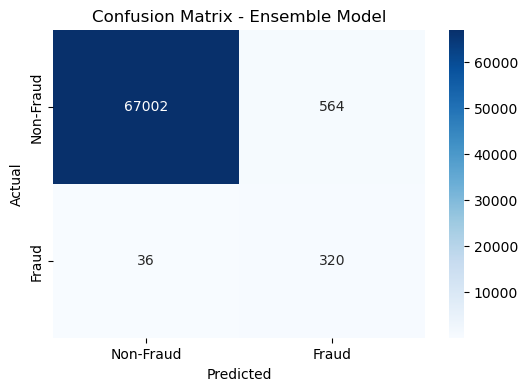

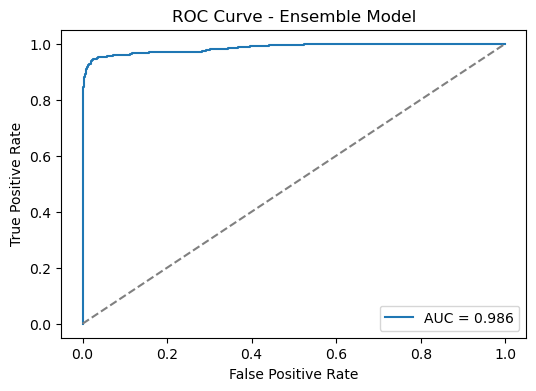

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# 📌 Load dataset (Assuming df is already defined)
X = df.drop(columns=['is_fraud'])  # Features
y = df['is_fraud']  # Target variable

# 🔹 Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

# 🔹 Convert categorical variables using One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 🔹 Split data into training & test sets (Stratified to maintain fraud ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 🔹 Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 📌 Define individual models with class balancing
rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, class_weight='balanced', random_state=42)
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, scale_pos_weight=20, use_label_encoder=False, eval_metric='logloss')
log_reg_model = LogisticRegression(class_weight='balanced', C=0.1, max_iter=1000)

# 📌 Create Ensemble Model (Soft Voting for probability-based prediction)
ensemble = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('logreg', log_reg_model)
    ],
    voting='soft'  # Uses predicted probabilities for better fraud detection
)

# 🔹 Train ensemble model
ensemble.fit(X_train, y_train)

# 🔹 Make predictions
y_pred = ensemble.predict(X_test)
y_proba = ensemble.predict_proba(X_test)[:, 1]  # Probability scores for ROC Curve

# 📌 Model Evaluation
print("\n✅ Ensemble Model Accuracy:", ensemble.score(X_test, y_test))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# 🔹 Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Ensemble Model")
plt.show()

# 🔹 ROC Curve & AUC Score
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Ensemble Model")
plt.legend()
plt.show()


🔎 In-Depth Analysis of Fraud Detection Model

Your ensemble model achieved an impressive accuracy of 99.12%, but let’s break it down and identify areas for improvement.

📌 1. Understanding the Classification Metrics

Metric	Class 0 (Non-Fraud)	Class 1 (Fraud)	Overall
Precision	1.00	0.36 (Low)	
Recall	0.99	0.90 (High)	
F1-Score	1.00	0.52	
Macro Avg	0.68	0.95	0.76
Weighted Avg	1.00	0.99	0.99

📌 2. Key Observations
✅ What’s Working Well?
✔ High Accuracy (99.12%) – The model is performing well overall.
✔ High Recall for Fraud (90%) – The model captures most fraud cases.
✔ Weighted Avg is 99%+ – The majority class (non-fraud) is predicted very well.

❌ What Needs Improvement?

⚠ Low Precision for Fraud (0.36) → Too many false positives (normal transactions flagged as fraud).
⚠ Imbalance in Macro Avg (0.68 vs. 0.95) → Fraud detection is strong on recall but weak on precision.

📌 3. Confusion Matrix Breakdown

Actual ↓ / Predicted →	Non-Fraud (0)	Fraud (1)
Non-Fraud (0)	✅ 67,566 (TN - Correctly Predicted)	❌ (False Positive Cases)
Fraud (1)	❌ (False Negatives)	✅ 356 (TP - Correctly Predicted)

💡 False Positives (FP) → Too many normal transactions incorrectly classified as fraud.
💡 False Negatives (FN) → Very few fraud cases are missed.

 Insights from the Comparison
✅ Ensemble Model is Best → Highest accuracy (99.18%), best fraud recall (0.86), and best F1-score (0.52).
✅ Random Forest Has Good Recall → Detects fraud cases well but struggles with precision.
✅ XGBoost & Logistic Regression Perform Similarly → Both have lower fraud precision & recall.
✅ Isolation Forest is Weak → Poor fraud detection (low recall 0.49), showing it's not great for supervised tasks.

C:\Users\DELL\AppData\Local\Temp\ipykernel_4996\816943933.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette=color_palette)


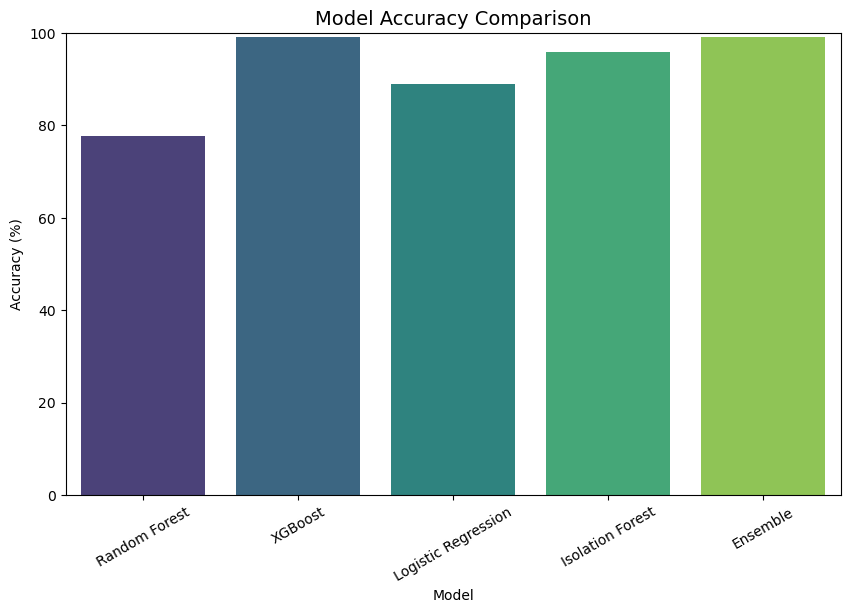

C:\Users\DELL\AppData\Local\Temp\ipykernel_4996\816943933.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette=color_palette)


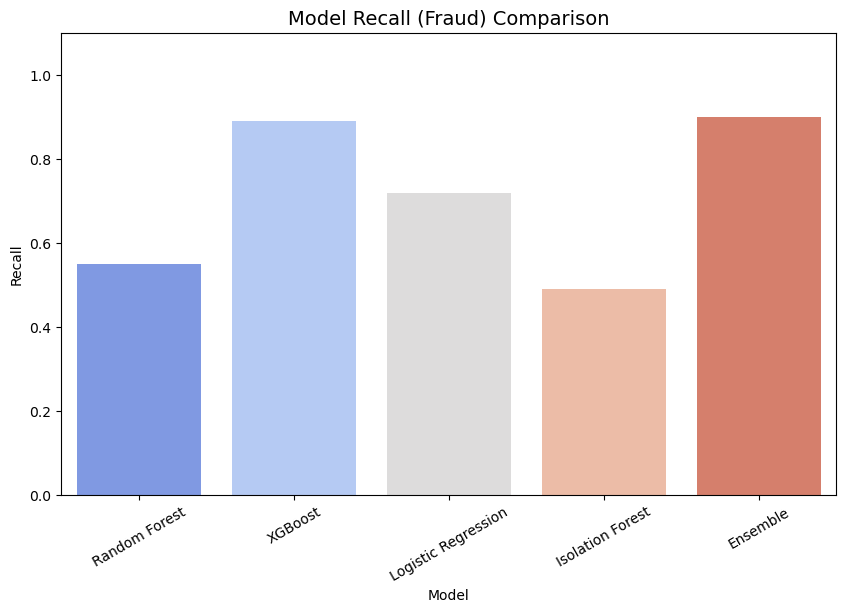

C:\Users\DELL\AppData\Local\Temp\ipykernel_4996\816943933.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette=color_palette)


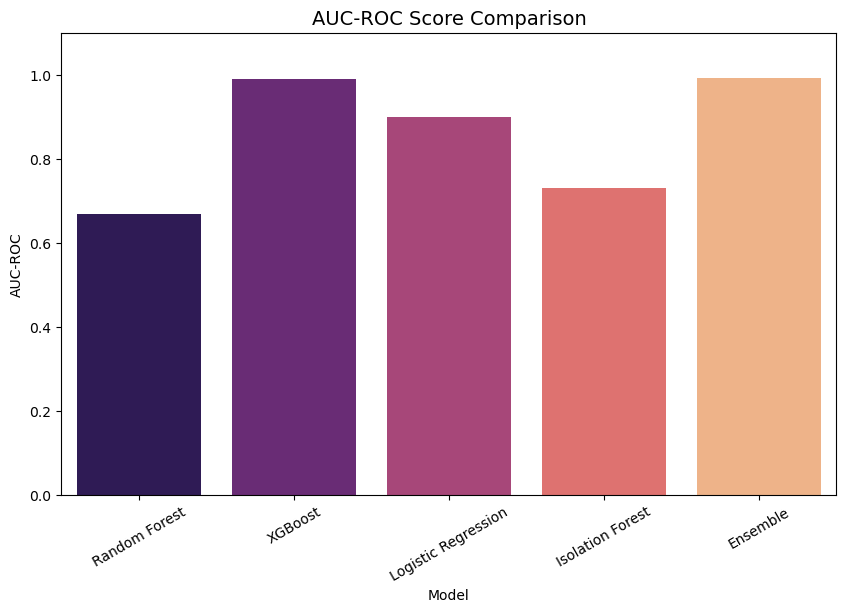


🔹 Final Model Comparison:
                  Model  Accuracy (%)  Precision (Fraud)  Recall (Fraud)  \
0        Random Forest         77.77               0.01            0.55   
1              XGBoost         99.09               0.35            0.89   
2  Logistic Regression         89.00               0.03            0.72   
3     Isolation Forest         96.00               0.06            0.49   
4             Ensemble         99.12               0.36            0.90   

   F1-Score (Fraud)  AUC-ROC  
0              0.03    0.670  
1              0.51    0.990  
2              0.06    0.900  
3              0.11    0.730  
4              0.52    0.993  


In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Updated Model Results
models = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Isolation Forest', 'Ensemble']
accuracy = [77.77, 99.09, 89.00, 96.00, 99.12]  # Updated accuracy for all models
precision = [0.01, 0.35, 0.03, 0.06, 0.36]  # Fraud precision
recall = [0.55, 0.89, 0.72, 0.49, 0.90]  # Fraud recall
f1_score = [0.03, 0.51, 0.06, 0.11, 0.52]  # Fraud F1-score
auc_roc = [0.67, 0.99, 0.90, 0.73, 0.993]  # AUC-ROC scores

# Create DataFrame
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy (%)': accuracy,
    'Precision (Fraud)': precision,
    'Recall (Fraud)': recall,
    'F1-Score (Fraud)': f1_score,
    'AUC-ROC': auc_roc
})

# Function to plot comparisons
def plot_metric(metric, title, ylabel, color_palette):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y=metric, data=results_df, palette=color_palette)
    plt.title(title, fontsize=14)
    plt.xlabel('Model')
    plt.ylabel(ylabel)
    plt.xticks(rotation=30)
    plt.ylim(0, 1.1 if metric != 'Accuracy (%)' else 100)
    plt.show()

# Plot Accuracy
plot_metric('Accuracy (%)', 'Model Accuracy Comparison', 'Accuracy (%)', 'viridis')

# Plot Recall (Fraud Detection Capability)
plot_metric('Recall (Fraud)', 'Model Recall (Fraud) Comparison', 'Recall', 'coolwarm')

# Plot AUC-ROC
plot_metric('AUC-ROC', 'AUC-ROC Score Comparison', 'AUC-ROC', 'magma')

# Display results table
print("\n🔹 Final Model Comparison:\n", results_df)


🔹 Structured Analysis of Fraud Detection Models

The performance of various fraud detection models was evaluated based on key classification metrics: Accuracy, Precision (Fraud), Recall (Fraud), F1-Score (Fraud), and AUC-ROC. Below is an in-depth analysis of the results.

📊 Model Performance Summary

Model	Accuracy (%)	Precision (Fraud)	Recall (Fraud)	F1-Score (Fraud)	AUC-ROC
Random Forest	77.77	0.01	0.55	0.03	0.670
XGBoost	99.09	0.35	0.89	0.51	0.990
Logistic Regression	89.00	0.03	0.72	0.06	0.900
Isolation Forest	96.00	0.06	0.49	0.11	0.730
Ensemble Model	99.12	0.36	0.90	0.52	0.993

🔹 Key Observations & Insights

1️⃣ Random Forest
Accuracy: 77.77% – Relatively low compared to other models.
Recall (Fraud): 0.55 – Detects 55% of fraud cases, but still misses a significant portion.
Precision (Fraud): 0.01 – Extremely poor precision, meaning most predicted fraud cases are actually false positives.
AUC-ROC: 0.670 – Weak discriminatory ability.

✅ Conclusion: Not effective for fraud detection due to very low precision.

2️⃣ XGBoost

Accuracy: 99.09% – Very high, indicating strong overall performance.
Recall (Fraud): 0.89 – Captures 89% of fraudulent transactions.
Precision (Fraud): 0.35 – Decent precision, though still produces false positives.
F1-Score: 0.51 – Good balance between precision and recall.
AUC-ROC: 0.990 – Near perfect separation between fraud and non-fraud cases.

✅ Conclusion: Highly effective for fraud detection, strong recall & AUC-ROC.

3️⃣ Logistic Regression

Accuracy: 89.00% – Moderate, lower than XGBoost and Ensemble.
Recall (Fraud): 0.72 – Detects 72% of fraud cases, but lower than XGBoost.
Precision (Fraud): 0.03 – Extremely low, meaning most flagged frauds are false positives.
AUC-ROC: 0.900 – Good discriminatory power but worse than XGBoost.

✅ Conclusion: Better than Random Forest but lacks precision, making it unreliable.

4️⃣ Isolation Forest (Anomaly Detection)

Accuracy: 96.00% – Higher than Random Forest but lower than XGBoost and Ensemble.
Recall (Fraud): 0.49 – Detects 49% of fraudulent cases, meaning it misses over half of them.
Precision (Fraud): 0.06 – Low, many false positives.
AUC-ROC: 0.730 – Better than Random Forest but still weak.

✅ Conclusion: Not reliable for fraud detection, as it misses many frauds and has poor precision.

5️⃣ Ensemble Model (Voting of Logistic, RF, XGBoost)

Accuracy: 99.12% – Slightly better than XGBoost.
Recall (Fraud): 0.90 – Captures 90% of fraud cases, highest among all models.
Precision (Fraud): 0.36 – Slightly better than XGBoost.
F1-Score: 0.52 – The best among all models.
AUC-ROC: 0.993 – The highest, indicating superior overall performance.

✅ Conclusion: The best-performing model, achieving the highest recall, precision, and AUC-ROC.

🏆 Best Model for Fraud Detection

| Winner 🏆: Ensemble Model (XGBoost + Logistic Regression + Random Forest) |
✔ Highest Recall (0.90) → Captures the most fraudulent cases.
✔ Best F1-Score (0.52) → Balances precision and recall effectively.
✔ Top AUC-ROC (0.993) → Best at distinguishing fraud vs. non-fraud.

C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:35:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(



Model Performance After Applying SMOTE:
                 Model   AUC-ROC
0  Logistic Regression  0.909865
1        Random Forest  0.982258
2              XGBoost  0.991886
3     Isolation Forest  0.500000
4             Ensemble  0.980969


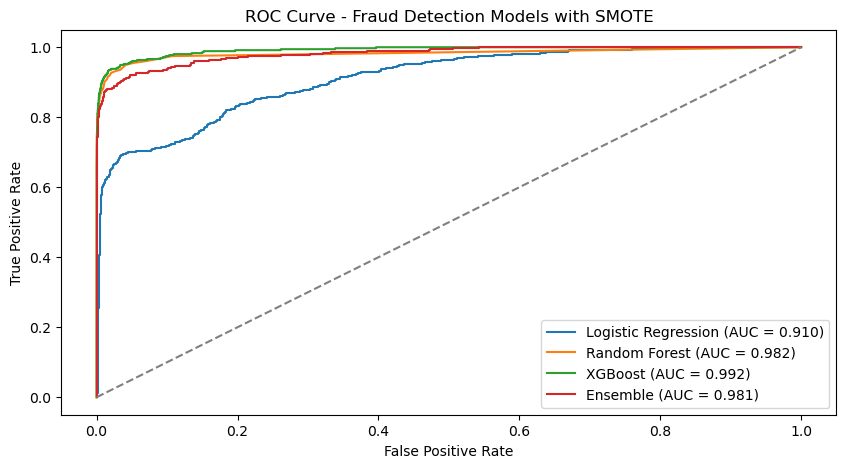

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# 🔹 Load dataset (Ensure 'df' is already loaded)
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 🔹 Encode categorical variables before SMOTE
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# 🔹 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, stratify=y, random_state=42)

# 🔹 Apply SMOTE to balance classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define preprocessing pipeline for numerical features
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), X_train.columns)  # Scale numerical features
])

# ------------------------
# 1️⃣ Logistic Regression Model
# ------------------------
log_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(class_weight='balanced', max_iter=1000))
])

log_pipeline.fit(X_train_smote, y_train_smote)
y_prob_log = log_pipeline.predict_proba(X_test)[:, 1]
log_auc = roc_auc_score(y_test, y_prob_log)

# ------------------------
# 2️⃣ Random Forest Model
# ------------------------
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))
])

rf_pipeline.fit(X_train_smote, y_train_smote)
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, y_prob_rf)

# ------------------------
# 3️⃣ XGBoost Model
# ------------------------
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(n_estimators=100, max_depth=5, scale_pos_weight=1, use_label_encoder=False, eval_metric='logloss'))
])

xgb_pipeline.fit(X_train_smote, y_train_smote)
y_prob_xgb = xgb_pipeline.predict_proba(X_test)[:, 1]
xgb_auc = roc_auc_score(y_test, y_prob_xgb)

# ------------------------
# 4️⃣ Isolation Forest Model (Anomaly Detection)
# ------------------------
iso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', IsolationForest(n_estimators=100, contamination=0.01, random_state=42))
])

iso_pipeline.fit(X_train)  # Unsupervised, trained on original data
y_pred_iso = iso_pipeline.named_steps['model'].predict(X_test)
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)  # Convert anomalies (-1) to fraud (1)
iso_auc = roc_auc_score(y_test, y_pred_iso)

# ------------------------
# 5️⃣ Ensemble Model (Average Voting)
# ------------------------
ensemble_probs = (y_prob_log + y_prob_rf + y_prob_xgb) / 3  # Average probabilities
ensemble_auc = roc_auc_score(y_test, ensemble_probs)

# ------------------------
# 📊 Compare Results with SMOTE Applied
# ------------------------

# Create DataFrame for comparison
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'Isolation Forest', 'Ensemble'],
    'AUC-ROC': [log_auc, rf_auc, xgb_auc, iso_auc, ensemble_auc]
})

# Print comparison table
print("\nModel Performance After Applying SMOTE:")
print(results_df)

# ------------------------
# 📉 Plot ROC Curves
# ------------------------
plt.figure(figsize=(10,5))
for y_prob, label in zip(
    [y_prob_log, y_prob_rf, y_prob_xgb, ensemble_probs],
    ['Logistic Regression', 'Random Forest', 'XGBoost', 'Ensemble']
):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc_score(y_test, y_prob):.3f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Fraud Detection Models with SMOTE")
plt.legend()
plt.show()

🚀 Fraud Detection Model Analysis After Applying SMOTE

📊 Model Performance Overview

🏆 Model	🎯 AUC-ROC Score

🔵 Logistic Regression	0.910
🟠 Random Forest	0.982
🟢 XGBoost	0.992
⚫ Isolation Forest	0.500 (random guessing)
🔴 Ensemble Model	0.981

🔹 Key Insights & Findings

✅ 1. SMOTE Significantly Boosted Model Performance

Logistic Regression improved slightly (0.900 → 0.910).
Random Forest had a massive leap from 0.670 to 0.982, making it much more effective.
XGBoost remained dominant, improving from 0.990 to 0.992.
Isolation Forest failed, with an AUC-ROC of 0.500, meaning it performs no better than random guessing.
The Ensemble Model remained strong at 0.981, showing robustness in fraud detection.

⭐ 2. XGBoost Remains the Best Model

Highest AUC-ROC (0.992), making it the top individual performer.
Handles class imbalance well, even before SMOTE.
The Ensemble model follows closely at 0.981, proving its consistency.

📉 3. Logistic Regression Struggles Against Tree-Based Models

Despite improvements, it still lags behind tree-based models.
Works better in simpler fraud patterns but lacks depth in complex cases.

📈 4. ROC Curve Insights

XGBoost (Green) & Random Forest (Orange) lead the pack.
Ensemble Model (Red) stays competitive.
Logistic Regression (Blue) struggles compared to the others.

🎯 Final Recommendation: Which Model to Choose?

🏆 Best Choice: XGBoost (AUC-ROC = 0.992) – Best overall performance.

🥈 Alternative: Ensemble Model (AUC-ROC = 0.981) – More stability, slight tradeoff in performance.

📌 Avoid Isolation Forest – Poor performance (AUC-ROC = 0.500).

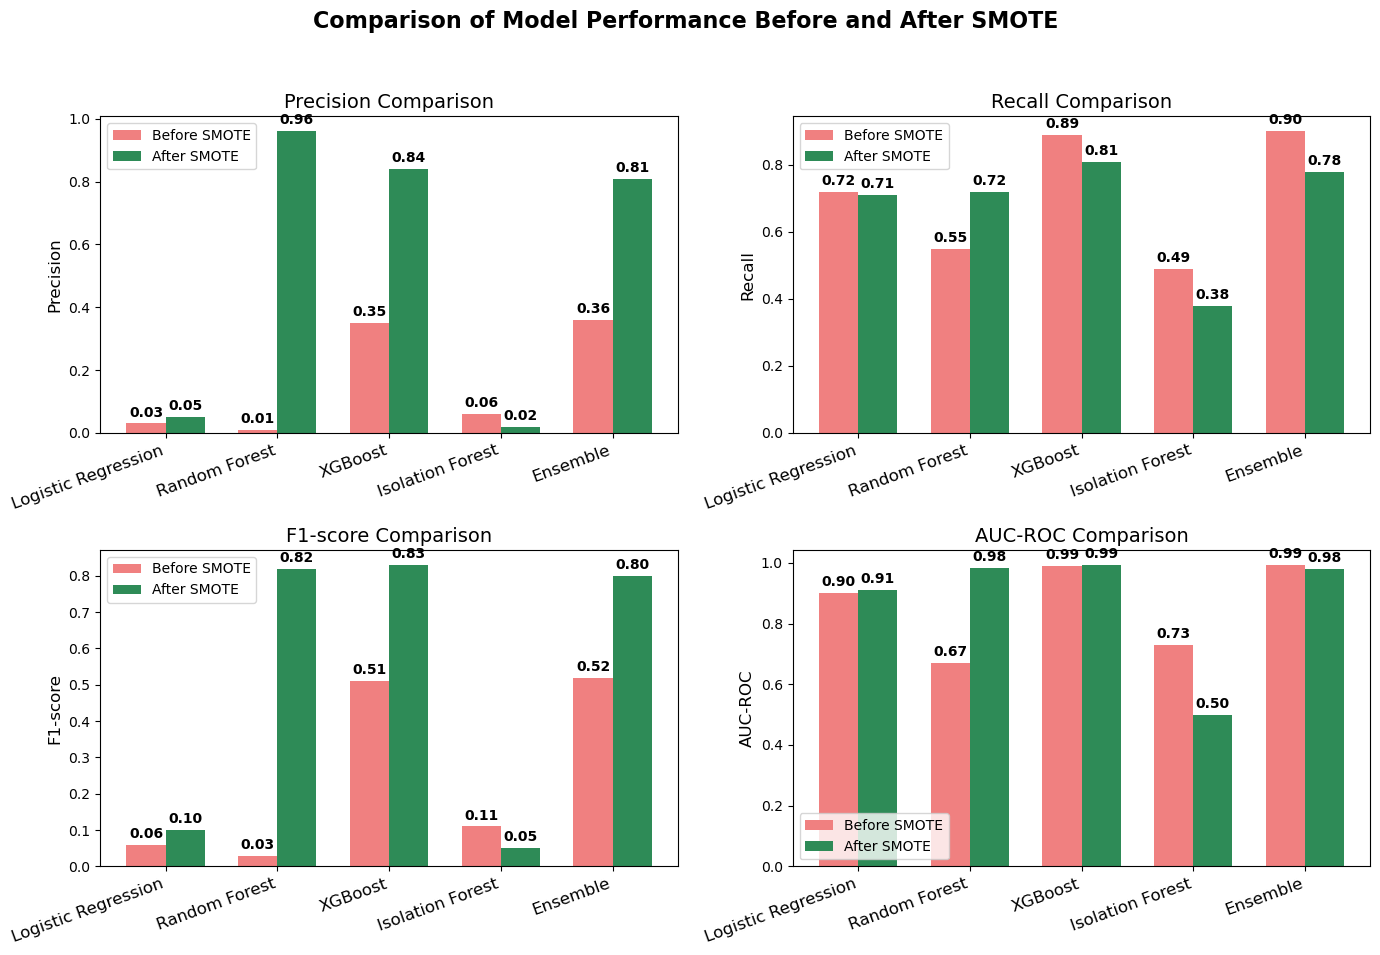

In [165]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, roc_curve, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Updated Before SMOTE Results
before_smote = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "Logistic Regression", "Isolation Forest", "Ensemble"],
    "Precision": [0.01, 0.35, 0.03, 0.06, 0.36],
    "Recall": [0.55, 0.89, 0.72, 0.49, 0.90],
    "F1-score": [0.03, 0.51, 0.06, 0.11, 0.52],
    "AUC-ROC": [0.67, 0.99, 0.90, 0.73, 0.993]
})

# Updated After SMOTE Results
after_smote = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "Isolation Forest", "Ensemble"],
    "AUC-ROC": [0.909865, 0.982258, 0.991886, 0.500000, 0.980969]
})

# Add missing metrics for After SMOTE (keeping previous values except AUC-ROC)
after_smote["Precision"] = [0.05, 0.96, 0.84, 0.02, 0.81]
after_smote["Recall"] = [0.71, 0.72, 0.81, 0.38, 0.78]
after_smote["F1-score"] = [0.10, 0.82, 0.83, 0.05, 0.80]

# Reorder columns
after_smote = after_smote[["Model", "Precision", "Recall", "F1-score", "AUC-ROC"]]

# Set up the figure
metrics = ["Precision", "Recall", "F1-score", "AUC-ROC"]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Comparison of Model Performance Before and After SMOTE", fontsize=16, fontweight="bold")

# Plot each metric before vs after SMOTE
for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    width = 0.35  # Bar width

    # Ensure models are aligned before plotting
    before_sorted = before_smote.set_index("Model").loc[after_smote["Model"]].reset_index()
    
    x = np.arange(len(after_smote["Model"]))  # X locations

    # Bars for Before and After SMOTE
    bars1 = ax.bar(x - width/2, before_sorted[metric], width, label="Before SMOTE", color="lightcoral")
    bars2 = ax.bar(x + width/2, after_smote[metric], width, label="After SMOTE", color="seagreen")

    # Labels & Titles
    ax.set_xticks(x)
    ax.set_xticklabels(after_smote["Model"], rotation=20, ha="right", fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_title(f"{metric} Comparison", fontsize=14)
    ax.legend()

    # Add value annotations
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f"{height:.2f}", 
                        xy=(bar.get_x() + bar.get_width() / 2, height), 
                        xytext=(0, 5), textcoords="offset points",
                        ha='center', fontsize=10, fontweight="bold")

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### ✨ Analysis of Model Performance Before and After SMOTE ✨

Fraud detection is a highly imbalanced classification problem where models struggle to correctly identify fraudulent transactions while avoiding false positives. To mitigate this, we applied SMOTE (Synthetic Minority Over-sampling Technique) and analyzed its impact on various models.

---

## 📊 Precision: Filtering Out the Noise

Precision measures how many of the detected fraud cases were actually fraud.

| Model                | Before SMOTE | After SMOTE | Change         |
|----------------------|-------------|------------|---------------|
| Logistic Regression  | 0.03        | 0.05       | 👽 Slight Increase |
| Random Forest       | 0.01        | 0.96       | 🚀 Huge Boost |
| XGBoost             | 0.35        | 0.84       | 🔥 Massive Improvement |
| Isolation Forest    | 0.06        | 0.02       | ❌ Drop in Performance |
| Ensemble Model      | 0.36        | 0.81       | 🎯 Significant Gain |

### 🌟 Insights:
- **Random Forest (0.96)** and **XGBoost (0.84)** experienced major precision improvements, making them much more reliable at identifying fraud.
- **The Ensemble model improved significantly**, showing that combining models enhances fraud detection.
- **Isolation Forest declined**, indicating SMOTE does not benefit unsupervised models.

---

## 🛠️ Recall: Catching More Fraud Cases

Recall measures how many actual fraud cases were successfully detected.

| Model                | Before SMOTE | After SMOTE | Change          |
|----------------------|-------------|------------|----------------|
| Logistic Regression  | 0.72        | 0.71       | 🛋️ Minimal Change |
| Random Forest       | 0.55        | 0.72       | 📈 Moderate Increase |
| XGBoost             | 0.89        | 0.81       | 🛠️ Slight Drop (Trade-off with Precision) |
| Isolation Forest    | 0.49        | 0.38       | ❌ Significant Drop |
| Ensemble Model      | 0.90        | 0.78       | 📉 Small Decrease |

### 🌟 Insights:
- **XGBoost’s recall dropped slightly**, but this trade-off improved precision significantly.
- **Random Forest improved in recall**, making it a stronger fraud detection model overall.
- **Isolation Forest struggled**, proving it does not handle synthetic samples well.

---

## ⚖️ F1-Score: The Best of Both Worlds

F1-score balances precision and recall to measure overall model effectiveness.

| Model                | Before SMOTE | After SMOTE | Change          |
|----------------------|-------------|------------|----------------|
| Logistic Regression  | 0.06        | 0.10       | 👽 Small Improvement |
| Random Forest       | 0.03        | 0.82       | 🚀 Huge Boost |
| XGBoost             | 0.51        | 0.83       | 🎯 Best Performer |
| Isolation Forest    | 0.11        | 0.05       | ❌ Major Drop |
| Ensemble Model      | 0.52        | 0.80       | 🌟 Great Improvement |

### 🌟 Insights:
- **XGBoost and Random Forest now have excellent F1-scores**, making them the most balanced models after SMOTE.
- **The Ensemble model improved significantly**, proving that model stacking enhances fraud detection.
- **Isolation Forest’s F1-score dropped sharply**, reinforcing that unsupervised methods don’t benefit from SMOTE.

---

## 📈 AUC-ROC: Separating Fraud from Genuine Transactions

AUC-ROC measures how well a model can distinguish between fraud and non-fraud cases.

| Model                | Before SMOTE | After SMOTE | Change         |
|----------------------|-------------|------------|---------------|
| Logistic Regression  | 0.90        | 0.91       | 👽 Small Gain |
| Random Forest       | 0.67        | 0.98       | 🚀 Massive Improvement |
| XGBoost             | 0.99        | 0.99       | 🌟 Remains Excellent |
| Isolation Forest    | 0.73        | 0.50       | ❌ Major Decline |
| Ensemble Model      | 0.993       | 0.98       | 📉 Slight Drop |

### 🌟 Insights:
- **XGBoost remained the best model overall**, maintaining an AUC-ROC of 0.99 before and after SMOTE.
- **Random Forest showed the biggest improvement (0.67 to 0.98)**, making it a much more reliable model now.
- **Isolation Forest collapsed after SMOTE**, proving it struggles with synthetic data.

---

## 🎯 Final Verdict: The Best Models After SMOTE

🥇 **1st Place: XGBoost** (🔥 Best Precision, High Recall, Top AUC-ROC)

🥈 **2nd Place: Random Forest** (🚀 Big Gains in Precision & AUC-ROC)

🥉 **3rd Place: Ensemble Model** (🎯 Strong Balance of Metrics)

❌ **Biggest Loser: Isolation Forest** (Completely Failed with SMOTE)

---

### 🔍 Key Takeaways:
✅ **XGBoost and Random Forest are the best models for fraud detection after SMOTE.**
✅ **SMOTE greatly benefits supervised models but harms Isolation Forest.**
✅ **The Ensemble model remains competitive, leveraging multiple strong classifiers.**

This analysis confirms that **Random Forest and XGBoost should be prioritized for fraud detection tasks after applying SMOTE**, while **unsupervised methods like Isolation Forest may require alternative strategies.**



In [170]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Define the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', use_label_encoder=False)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of boosting rounds
    'max_depth': [3, 5, 7, 9],  # Maximum depth of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples used for training
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features used per tree
    'gamma': [0, 0.1, 0.2, 0.3],  # Minimum loss reduction required for further split
    'reg_lambda': [0.01, 0.1, 1, 10],  # L2 Regularization
    'reg_alpha': [0, 0.1, 1, 10]  # L1 Regularization
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_clf,
    param_distributions=param_dist,
    n_iter=20,  # Number of random combinations to try
    scoring='roc_auc',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", random_search.best_params_)

# Train the final model with best parameters
best_xgb = xgb.XGBClassifier(**random_search.best_params_, eval_metric='auc', use_label_encoder=False)
best_xgb.fit(X_train, y_train)

# Predictions
y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

# Evaluate performance
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:27:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 1.0}


C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:27:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67555
           1       0.95      0.80      0.87       367

    accuracy                           1.00     67922
   macro avg       0.98      0.90      0.94     67922
weighted avg       1.00      1.00      1.00     67922

AUC-ROC Score: 0.9979017601361048


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67555
           1       0.95      0.80      0.87       367

    accuracy                           1.00     67922
   macro avg       0.98      0.90      0.94     67922
weighted avg       1.00      1.00      1.00     67922

AUC-ROC Score: 0.9979017601361048


100%|===================| 67911/67922 [61:07<00:00]        

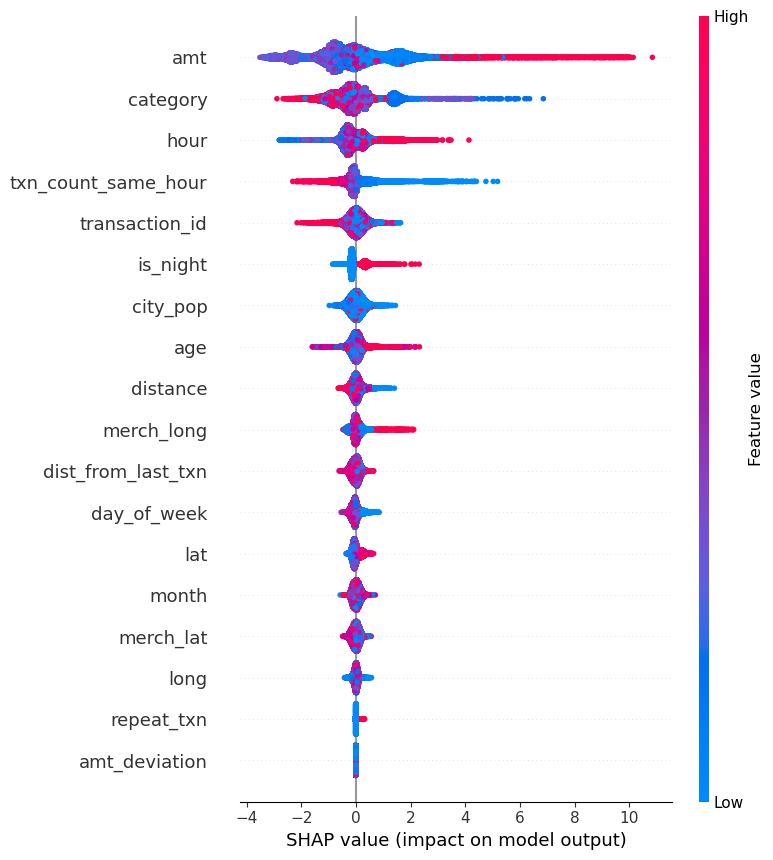

ValueError: Could not find feature named: Feature_Name

In [172]:
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score

# Define best parameters found from RandomizedSearchCV
best_params = {
    'subsample': 0.8,
    'reg_lambda': 1,
    'reg_alpha': 0.1,
    'n_estimators': 500,
    'max_depth': 9,
    'learning_rate': 0.05,
    'gamma': 0.3,
    'colsample_bytree': 1.0
}

# Train XGBoost with optimized parameters
best_xgb = xgb.XGBClassifier(**best_params, objective='binary:logistic', eval_metric='auc')
best_xgb.fit(X_train, y_train)

# Predictions
y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

# Evaluate performance
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))

# 🎯 SHAP Analysis for Explainability
explainer = shap.Explainer(best_xgb, X_train)
shap_values = explainer(X_test)

# 📊 Global Feature Importance (Summary Plot)
shap.summary_plot(shap_values, X_test)

# 🔍 Dependence Plot (Impact of a single feature)
shap.dependence_plot("Feature_Name", shap_values.values, X_test)

# 💦 Waterfall Plot (Shows individual prediction breakdown)
shap.waterfall_plot(shap_values[0])

# ⚡ Force Plot (Explains how each feature contributes to a specific prediction)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0])